# 7/17 박소정

In [175]:
from sklearn.manifold import TSNE
import matplotlib as mpl
import matplotlib.pyplot as plt
import gensim
import gensim.models as g
import matplotlib.font_manager as fm
import pandas as pd
import pickle
import re
import konlpy
import numpy as np
import sklearn.decomposition

In [49]:
print('버전:', mpl.__version__)
print('설정 위치:', mpl.__file__)
print('설정 위치:', mpl.get_configdir())
print('캐시 위치:', mpl.get_cachedir())

버전: 3.0.3
설정 위치: C:\Users\parks\Anaconda3\lib\site-packages\matplotlib\__init__.py
설정 위치: C:\Users\parks\.matplotlib
캐시 위치: C:\Users\parks\.matplotlib


In [50]:
print('설정 파일 위치:', mpl.matplotlib_fname())

설정 파일 위치: C:\Users\parks\Anaconda3\lib\site-packages\matplotlib\mpl-data\matplotlibrc


In [ ]:
font_list = fm.findSystemFonts(fontpaths=None, fontext='ttf')

In [177]:
plt.rcParams['font.family'] = 'LG PC'
mpl.rcParams['axes.unicode_minus'] = False

In [178]:
import pandas as pd

In [28]:
df.head(10)

,x,y
사업,0.423980,5.556947
내용,-0.672305,6.117478
제조업,-2.281093,5.107941
개요,-0.256768,5.543795
업계,-2.188293,-1.625761
현황,0.022479,5.591516
국내,-1.179981,-3.363346
시장,0.903757,-1.685700
가전,-1.568673,-3.798282
수요,1.896566,-0.514915


## TSNE 시도

In [41]:
vocab = list(doc2vec_model_nouns.wv.vocab)
X = doc2vec_model_nouns[vocab]

print(len(X))
print(X[0][:10])
tsne = TSNE(n_components=2)

X_tsne = tsne.fit_transform(X[:1000, :])

df = pd.DataFrame(X_tsne, index=vocab[:1000], columns=['x', 'y'])


fig = plt.figure()
fig.set_size_inches(400, 200)
ax = fig.add_subplot(1, 1, 1)

ax.scatter(df['x'], df['y'], s=4000)

for word, pos in df.iterrows():
    ax.annotate(word, pos, fontsize=200)

plt.savefig('TSNE3')
plt.close(fig)

3566
[ 5.5460715e-01 -1.9237630e+00 -2.6110280e-04  2.0082323e-01
  2.7723771e-01  7.1270859e-01 -4.4400468e-02 -5.3885734e-01
  6.2575686e-01  4.0858263e-01]


## PCA 시도

In [180]:
with open(r'C:/Users/parks/Desktop/models_5차원/samjeon_doc2vec.pkl', 'rb') as f:
    doc2vec_model = pickle.load(f)

vocab = list(doc2vec_model.wv.vocab)
X = doc2vec_model[vocab]

pca = sklearn.decomposition.PCA(n_components=2)
X_pca = pca.fit_transform(X)

df2 = pd.DataFrame(X_pca, index=vocab, columns=['x', 'y'])
df_random = df2.sample(n=1000)

fig = plt.figure()
fig.set_size_inches(40, 20)
ax = fig.add_subplot(1, 1, 1)
ax.scatter(df_random['x'], df_random['y'])

for word, pos in df_random.iterrows():
    ax.annotate(word, pos, fontsize=30)


plt.savefig('PCA_word', dpi=300)
plt.close(fig)

## word를 PCA->TSNE

In [196]:
with open(r'C:/Users/parks/Desktop/models_5차원/samjeon_doc2vec.pkl', 'rb') as f:
    doc2vec_model = pickle.load(f)

vocab = list(doc2vec_model.wv.vocab)
X = doc2vec_model[vocab]

pca = sklearn.decomposition.PCA(n_components=50)
X_pca = pca.fit_transform(X)


X_tsne = tsne.fit_transform(X_pca)


df3 = pd.DataFrame(X_tsne, index=vocab, columns=['x', 'y'])
df3_random = df3.sample(n=1000)


fig = plt.figure()
fig.set_size_inches(40, 20)
ax = fig.add_subplot(1, 1, 1)

ax.scatter(df3['x'], df3['y'], s=250)

for word, pos in df3.iterrows():
    ax.annotate(word, pos, fontsize=20)

plt.savefig('word_pca_tsne', dpi=300)
plt.close(fig)


## document를 PCA->TSNE

In [195]:
with open(r'C:/Users/parks/Desktop/models_5차원/samjeon_doc2vec.pkl', 'rb') as f:
    doc2vec_model = pickle.load(f)
    
year_index = [x for x in range(1998, 2020)]
    
document = [doc2vec_model.docvecs[i] for i in range(0, len(doc2vec_model.docvecs))]
pca = sklearn.decomposition.PCA(n_components=10)
X_pca = pca.fit_transform(document)

X_tsne = tsne.fit_transform(X_pca)

df4 = pd.DataFrame(X_tsne, index=year_index, columns=['x', 'y'])

fig = plt.figure()
fig.set_size_inches(40, 20)
ax = fig.add_subplot(1, 1, 1)

ax.scatter(df4['x'], df4['y'], s=500)


for word, pos in df4.iterrows():
    ax.annotate(word, pos, fontsize=30)

plt.savefig('document_pca_tsne', dpi=300)
plt.close(fig)

## PCA, TSNE 같이 그려봄

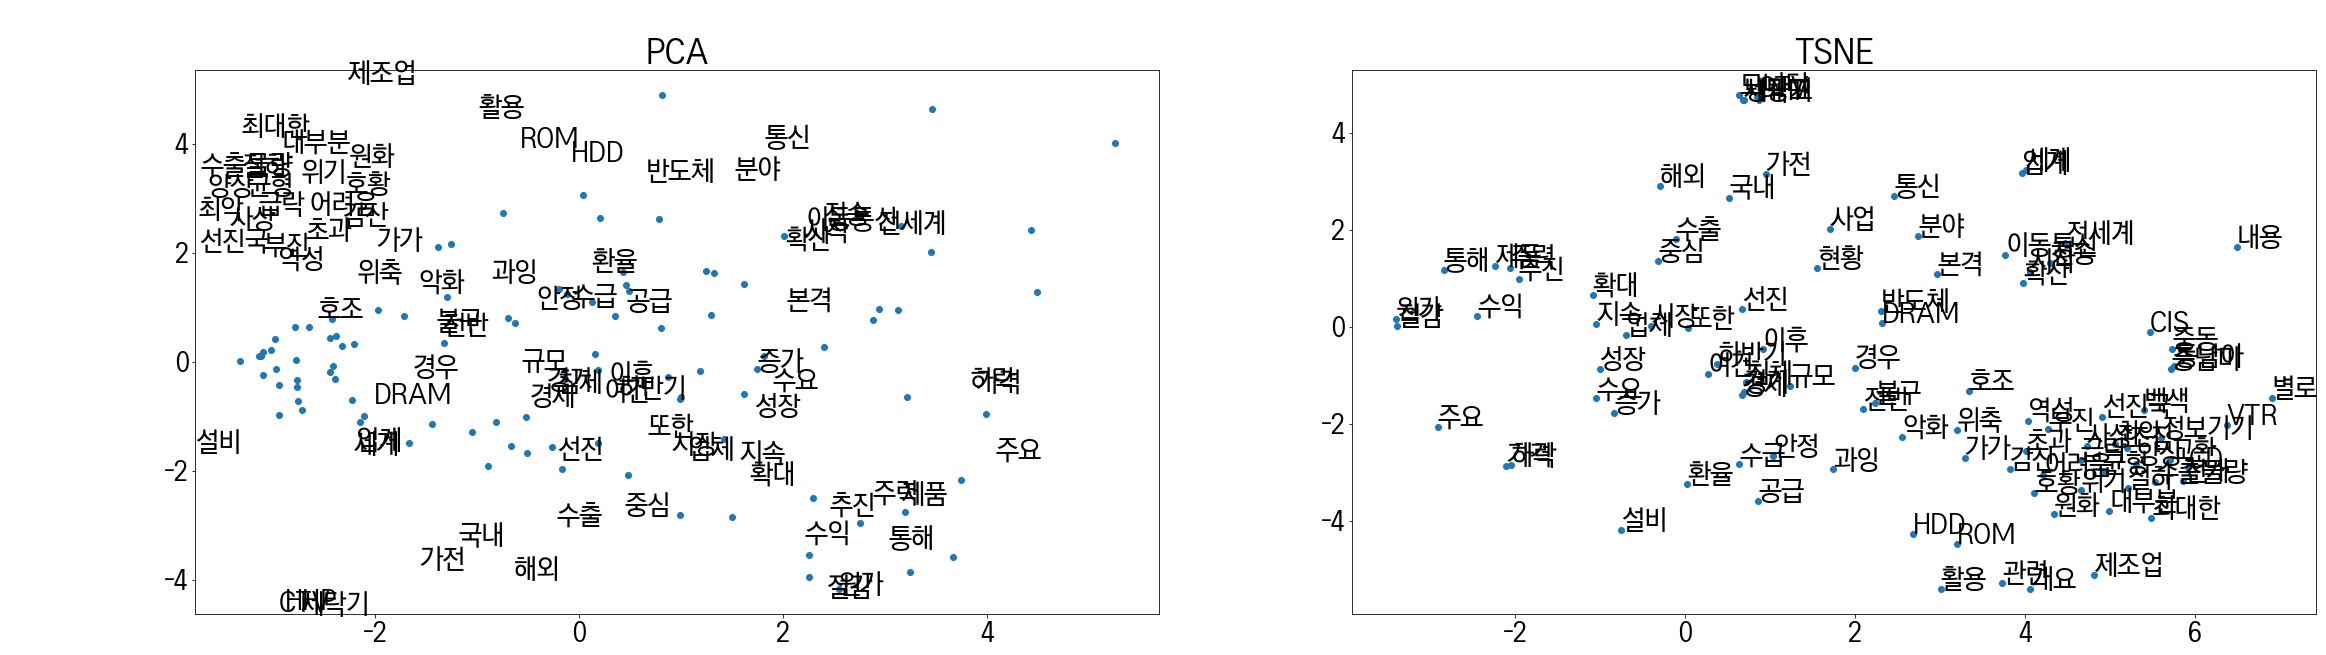

In [31]:
f, ax = plt.subplots(1, 2, figsize=(38, 10))

ax[0].set_title('PCA')
ax[1].set_title('TSNE')


#PCA

vocab = list(doc2vec_model_nouns.wv.vocab)
X = doc2vec_model_nouns[vocab]

pca = sklearn.decomposition.PCA(n_components=2)
X_pca = pca.fit_transform(X[:100, :])

df2 = pd.DataFrame(X_pca, index=vocab[:100], columns=['x', 'y'])


ax[0].scatter(df2['x'], df2['y'])

for word, pos in df.iterrows():
    ax[0].annotate(word, pos, fontsize=30)
    


tsne = TSNE(n_components=2)

X_tsne = tsne.fit_transform(X[:100, :])

df = pd.DataFrame(X_tsne, index=vocab[:100], columns=['x', 'y'])
df.shape



ax[1].scatter(df['x'], df['y'])

for word, pos in df.iterrows():
    ax[1].annotate(word, pos, fontsize=30)

plt.show()

In [ ]:
def produce_pca(model):
    docvecs = [model.docvecs[i] for i in range(0, len(model.docvecs))]
    pca = sklearn.decomposition.PCA(n_components=2)
    pca.fit(docvecs)
    reduced_docvecs = pca.transform(docvecs)
    matplotlib.rcParams["font.size"] = 30
    fig, ax = plt.subplots(figsize=(40,30))
    ax.scatter(reduced_docvecs[:,0], reduced_docvecs[:,1], s = 500)

    for i, txt in enumerate(range(1998,2020)):
        ax.annotate(txt, (reduced_docvecs[:,0][i], reduced_docvecs[:,1][i]))

## document 와 word를 함께 PCA

In [199]:
with open(r'C:/Users/parks/Desktop/models_5차원/samjeon_doc2vec.pkl', 'rb') as f:
    doc2vec_model = pickle.load(f)

document = [doc2vec_model.docvecs[i] for i in range(0, len(doc2vec_model.docvecs))] # len = 22, 각각 5*20



vocab = list(doc2vec_model.wv.vocab)
X = doc2vec_model[vocab]

year_index = [x for x in range(1998, 2020)]

result = np.concatenate((document, X), axis=0)
  #(22, 100)은 document, (3566, 100)은 word

PCA = sklearn.decomposition.PCA(n_components=2)
X_PCA = PCA.fit_transform(result)

data = pd.DataFrame(X_PCA, index=year_index+vocab, columns=['x', 'y'])


fig = plt.figure()
fig.set_size_inches(40, 20)
ax = fig.add_subplot(1, 1, 1)

ax.scatter(data[:23]['x'], data[:23]['y'], s=200, color='red')
ax.scatter(data[23:]['x'], data[23:]['y'], s=200, color='blue')


for word, pos in data.iterrows():
    ax.annotate(word, pos, fontsize=30)
    
plt.savefig('doc_word_PCA', dpi=300)
plt.close(fig)


## document와 word를 함께 TSNE

In [200]:
with open(r'C:/Users/parks/Desktop/models_5차원/samjeon_doc2vec.pkl', 'rb') as f:
    doc2vec_model = pickle.load(f)


document = [doc2vec_model.docvecs[i] for i in range(0, len(doc2vec_model.docvecs))] # len = 22, 각각 5*20



vocab = list(doc2vec_model.wv.vocab)
X = doc2vec_model[vocab]

year_index = [x for x in range(1998, 2020)]

result = np.concatenate((document, X), axis=0)


T_SNE = TSNE(n_components=2)
X_T_SNE = T_SNE.fit_transform(result)

tsne_data = pd.DataFrame(X_T_SNE, index=year_index+vocab, columns=['x', 'y'])



fig = plt.figure()
fig.set_size_inches(40, 20)
ax = fig.add_subplot(1, 1, 1)

ax.scatter(tsne_data[:23]['x'], tsne_data[:23]['y'], s=200, color='red')
ax.scatter(tsne_data[23:]['x'], tsne_data[23:]['y'], s=200, color='blue')

for word, pos in tsne_data.iterrows():
    ax.annotate(word, pos, fontsize=30)
    
plt.savefig('doc_word_TSNE', dpi=300)
plt.close(fig)
    

#scatter에서 color를다르게 .


## 전년도-다음년도 해서 차이를 PCA&TSNE

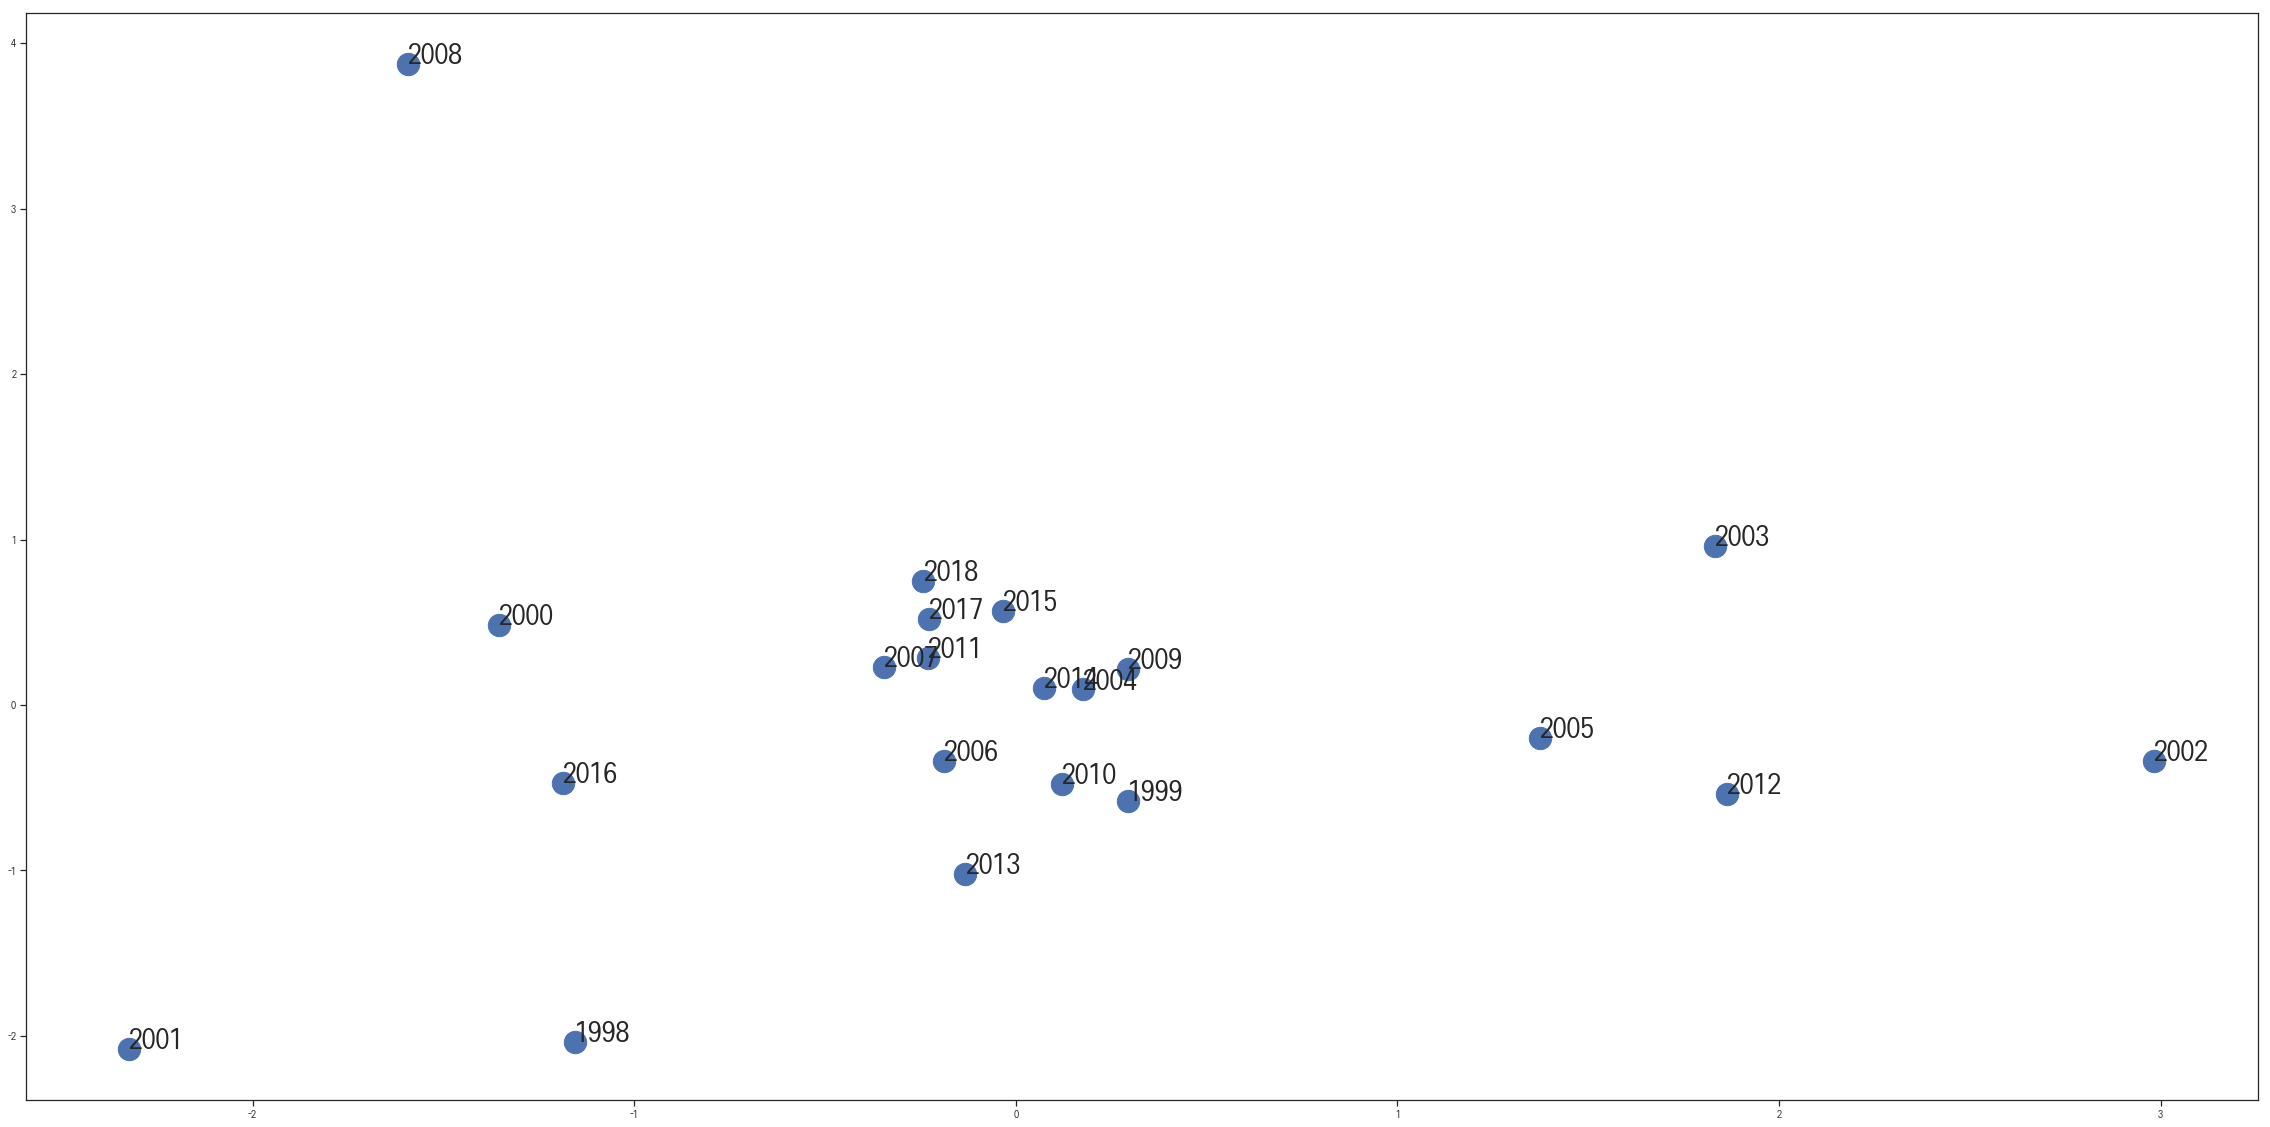

In [189]:
with open(r'C:/Users/parks/Desktop/models_5차원/samjeon_doc2vec.pkl', 'rb') as f:
    doc2vec_model = pickle.load(f)
    

document = [doc2vec_model.docvecs[i] for i in range(0, len(doc2vec_model.docvecs))] # len = 22, 각각 5*20

document_sub = []

for i in range(len(document)-1):
    document_sub.append(document[i]-document[i+1])


year_index = [x for x in range(1998, 2019)] #1998 이면 1998년-1999년


PCA = sklearn.decomposition.PCA(n_components=2)
X_PCA = PCA.fit_transform(document_sub)

data = pd.DataFrame(X_PCA, index=year_index, columns=['x', 'y'])


fig = plt.figure()
fig.set_size_inches(40, 20)
ax = fig.add_subplot(1, 1, 1)

ax.scatter(data['x'], data['y'], s=500)

for word, pos in data.iterrows():
    ax.annotate(word, pos, fontsize=30)
    
plt.savefig('difference_PCA', dpi=300)


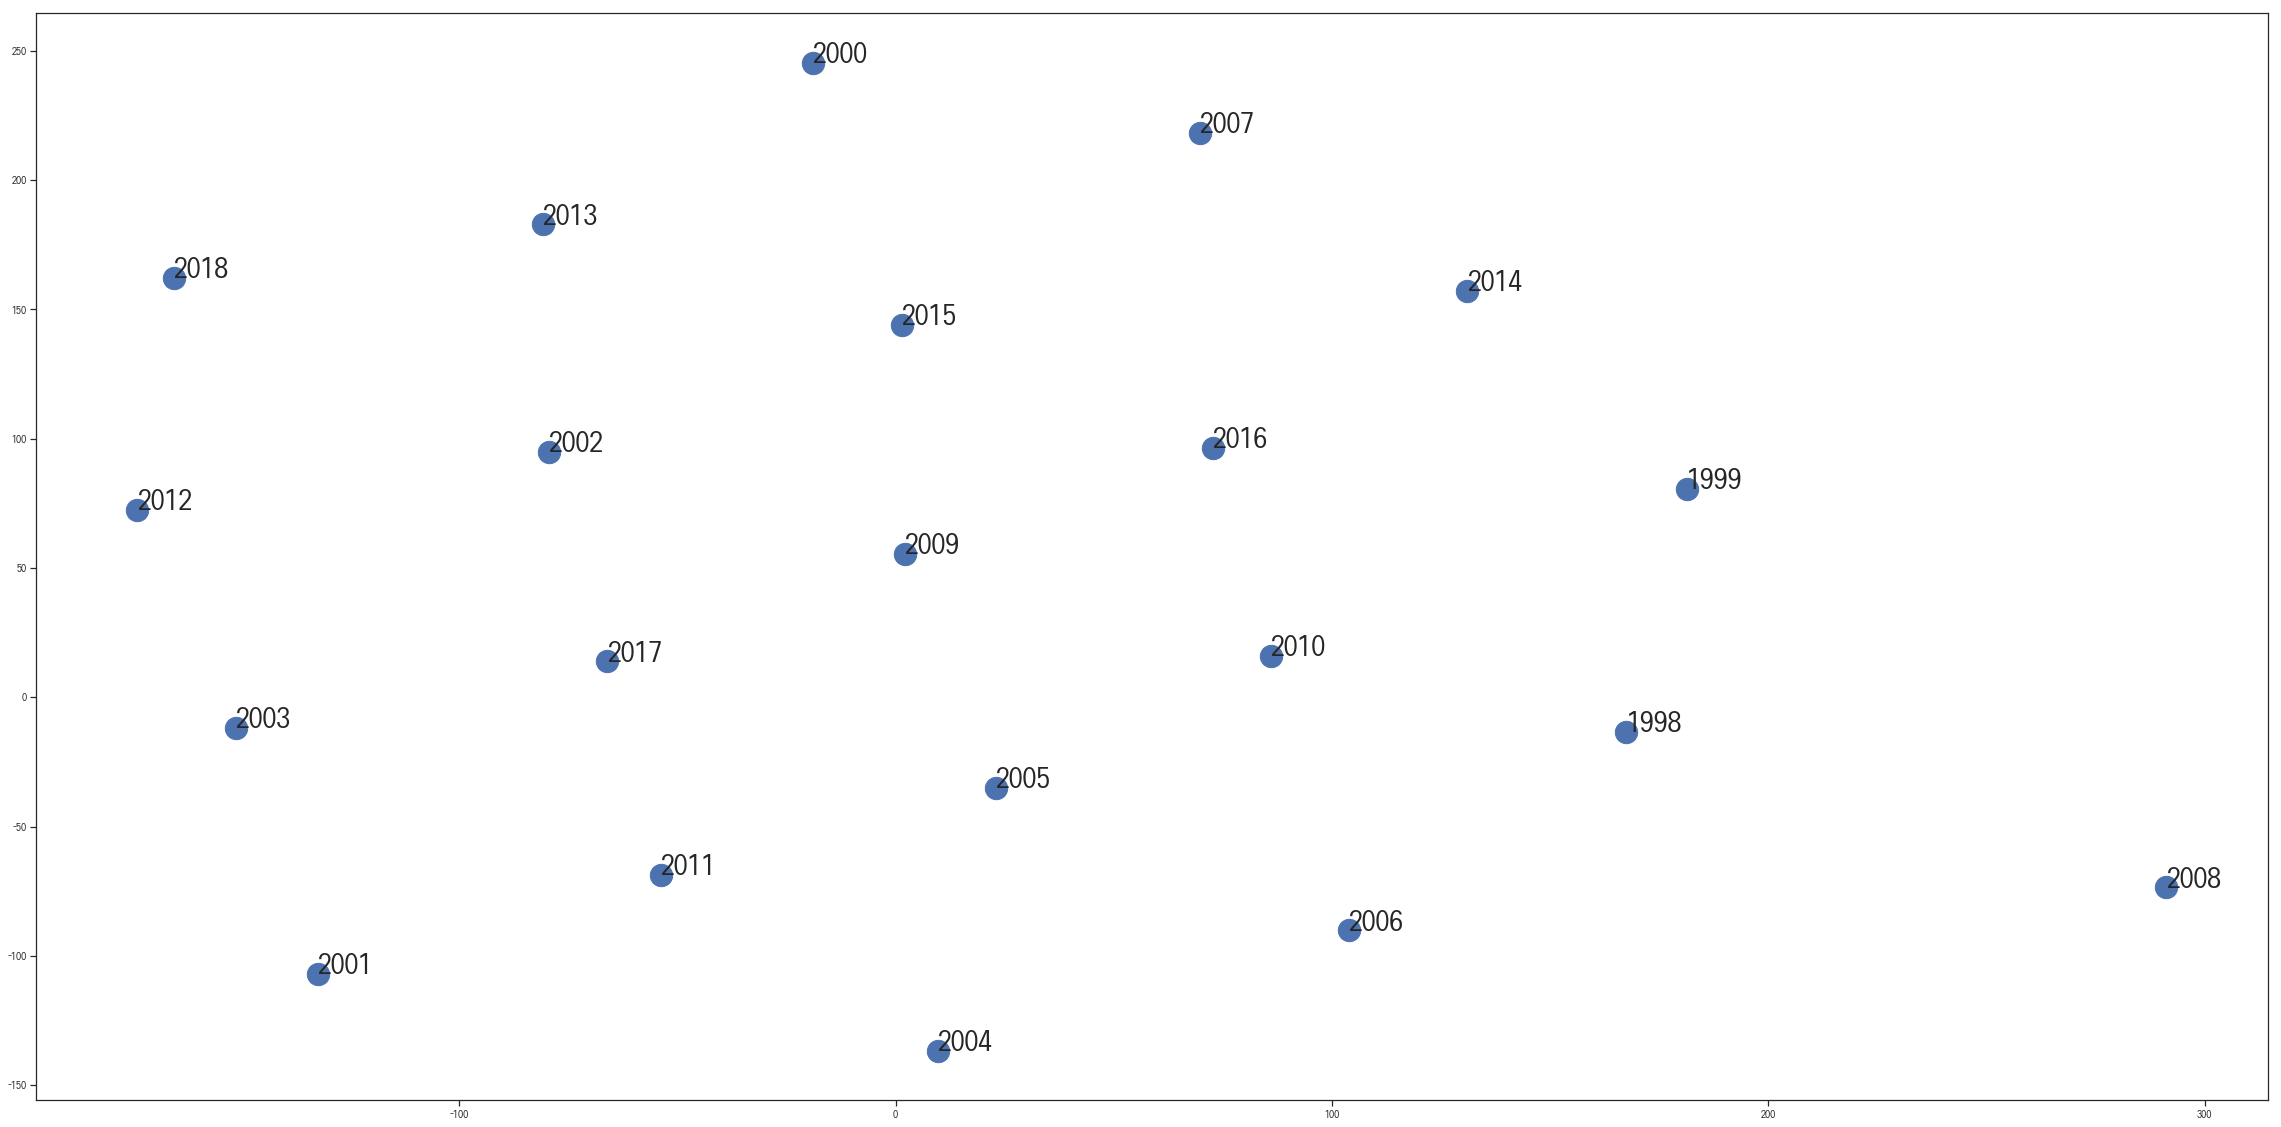

In [186]:
with open(r'C:/Users/parks/Desktop/models_5차원/samjeon_doc2vec.pkl', 'rb') as f:
    doc2vec_model = pickle.load(f)
    

document = [doc2vec_model.docvecs[i] for i in range(0, len(doc2vec_model.docvecs))] # len = 22

document_sub = []

for i in range(len(document)-1):
    document_sub.append(document[i]-document[i+1])


year_index = [x for x in range(1998, 2019)] #1998 이면 1998년-1999년


T_SNE = TSNE(n_components=2)
X_T_SNE = T_SNE.fit_transform(document_sub)

tsne_data = pd.DataFrame(X_T_SNE, index=year_index, columns=['x', 'y'])



fig = plt.figure()
fig.set_size_inches(40, 20)
ax = fig.add_subplot(1, 1, 1)

ax.scatter(tsne_data['x'], tsne_data['y'], s=500)

for word, pos in tsne_data.iterrows():
    ax.annotate(word, pos, fontsize=30)
    
plt.savefig('difference_TSNE', dpi=300)

## X_PCA로 10차원으로 줄인 걸 TSNE에 대입

In [187]:
with open(r'C:/Users/parks/Desktop/models_5차원/samjeon_doc2vec.pkl', 'rb') as f:
    doc2vec_model = pickle.load(f)
    


document = [doc2vec_model.docvecs[i] for i in range(0, len(doc2vec_model.docvecs))] # len = 22, 각각 5*20

document_sub = []

for i in range(len(document)-1):
    document_sub.append(document[i]-document[i+1])


year_index = [x for x in range(1998, 2019)] #1998 이면 1998년-1999년


PCA = sklearn.decomposition.PCA(n_components=15)
X_PCA = PCA.fit_transform(document_sub)


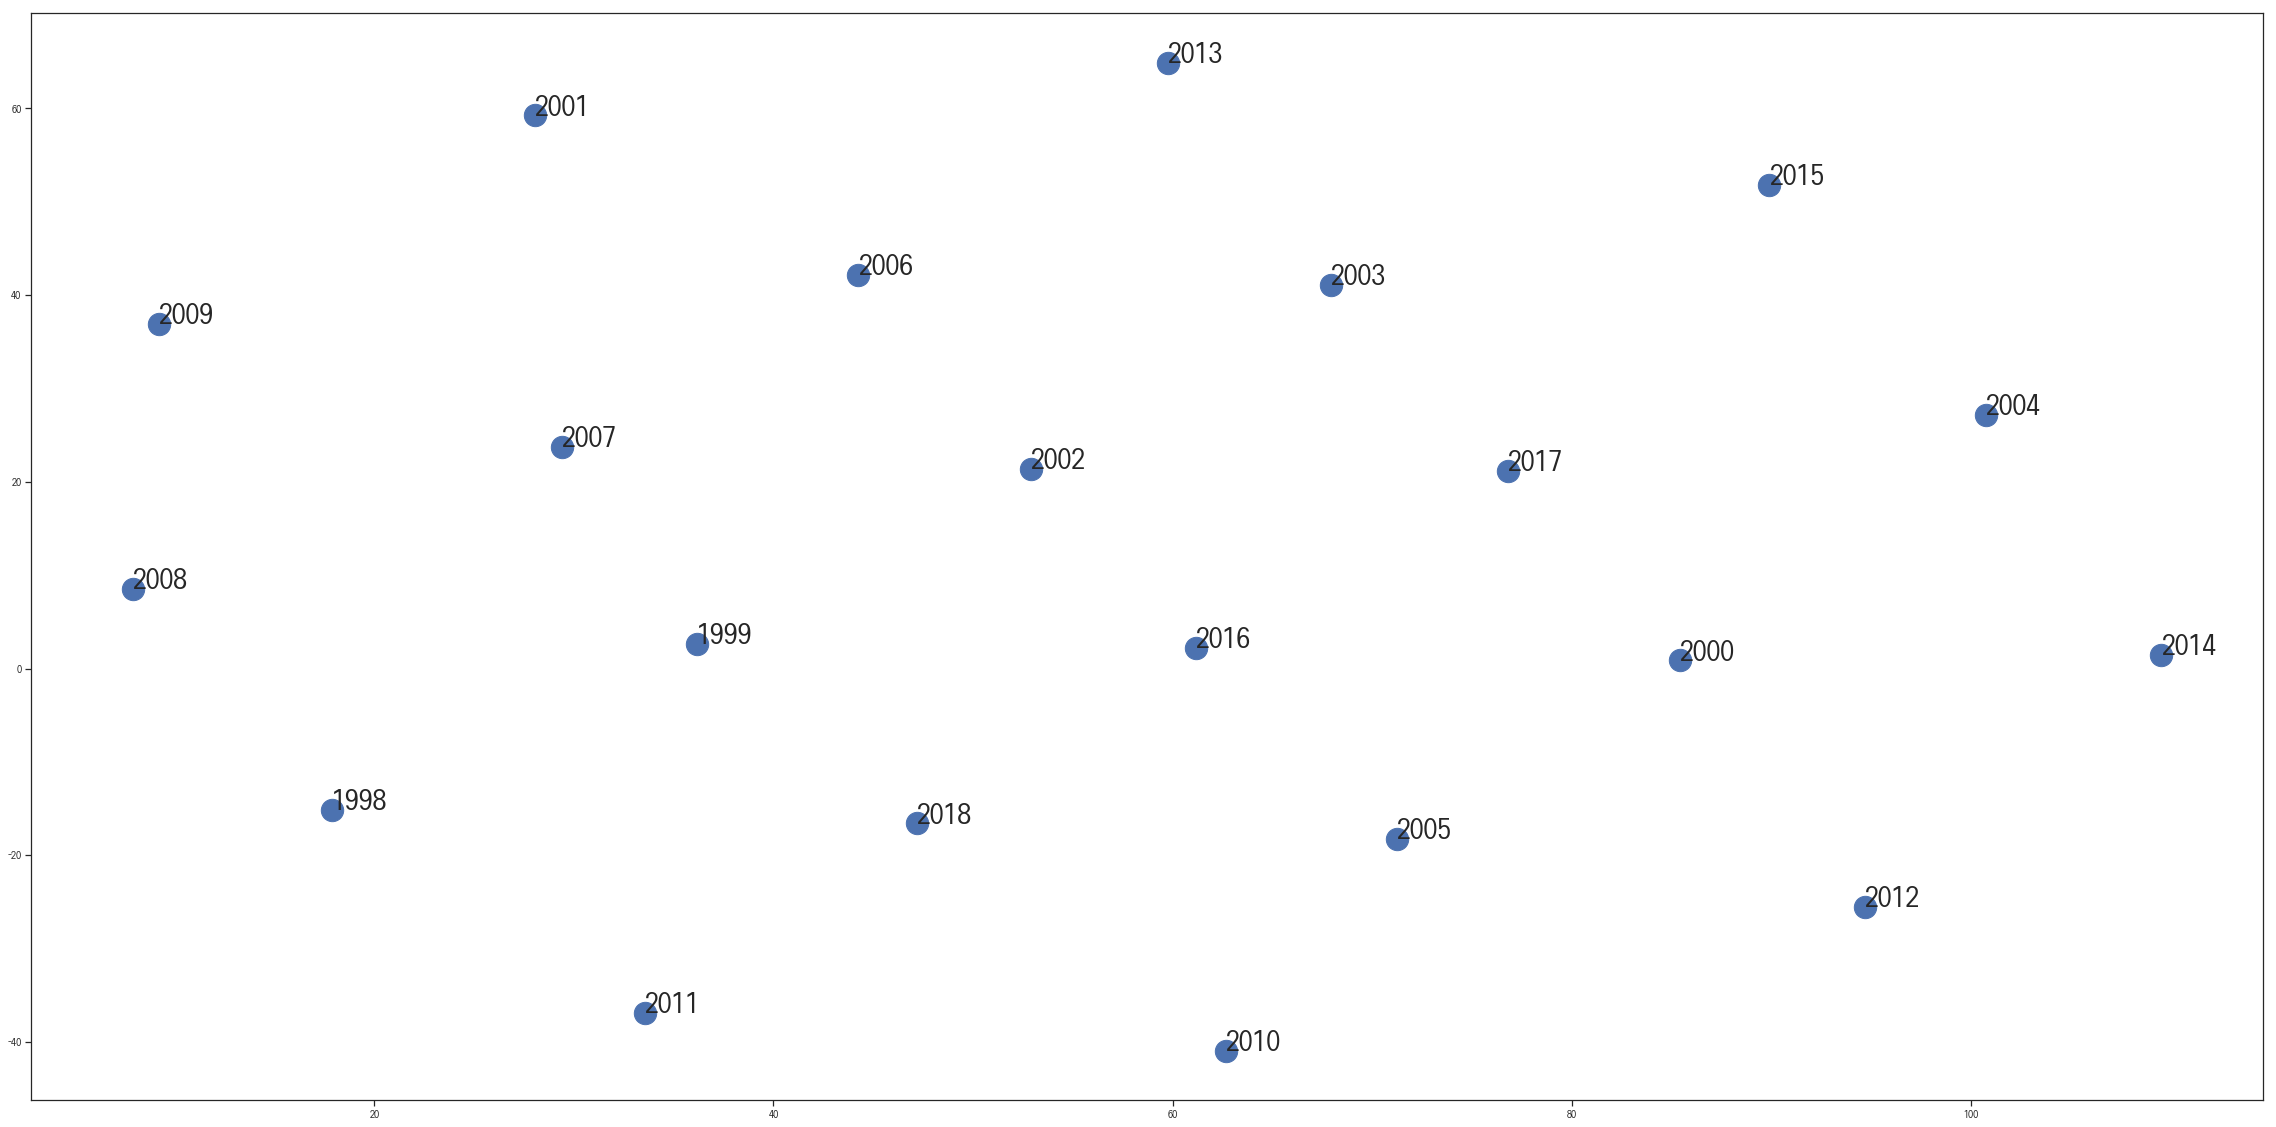

In [188]:
T_SNE = TSNE(n_components=2)
X_T_SNE = T_SNE.fit_transform(X_PCA)

tsne_data = pd.DataFrame(X_T_SNE, index=year_index, columns=['x', 'y'])



fig = plt.figure()
fig.set_size_inches(40, 20)
ax = fig.add_subplot(1, 1, 1)

ax.scatter(tsne_data['x'], tsne_data['y'], s=500)

for word, pos in tsne_data.iterrows():
    ax.annotate(word, pos, fontsize=30)
    
plt.savefig('difference_PCA_TSNE', dpi=300)

## document의 각 array에서 두개씩만 가져와서 scatter

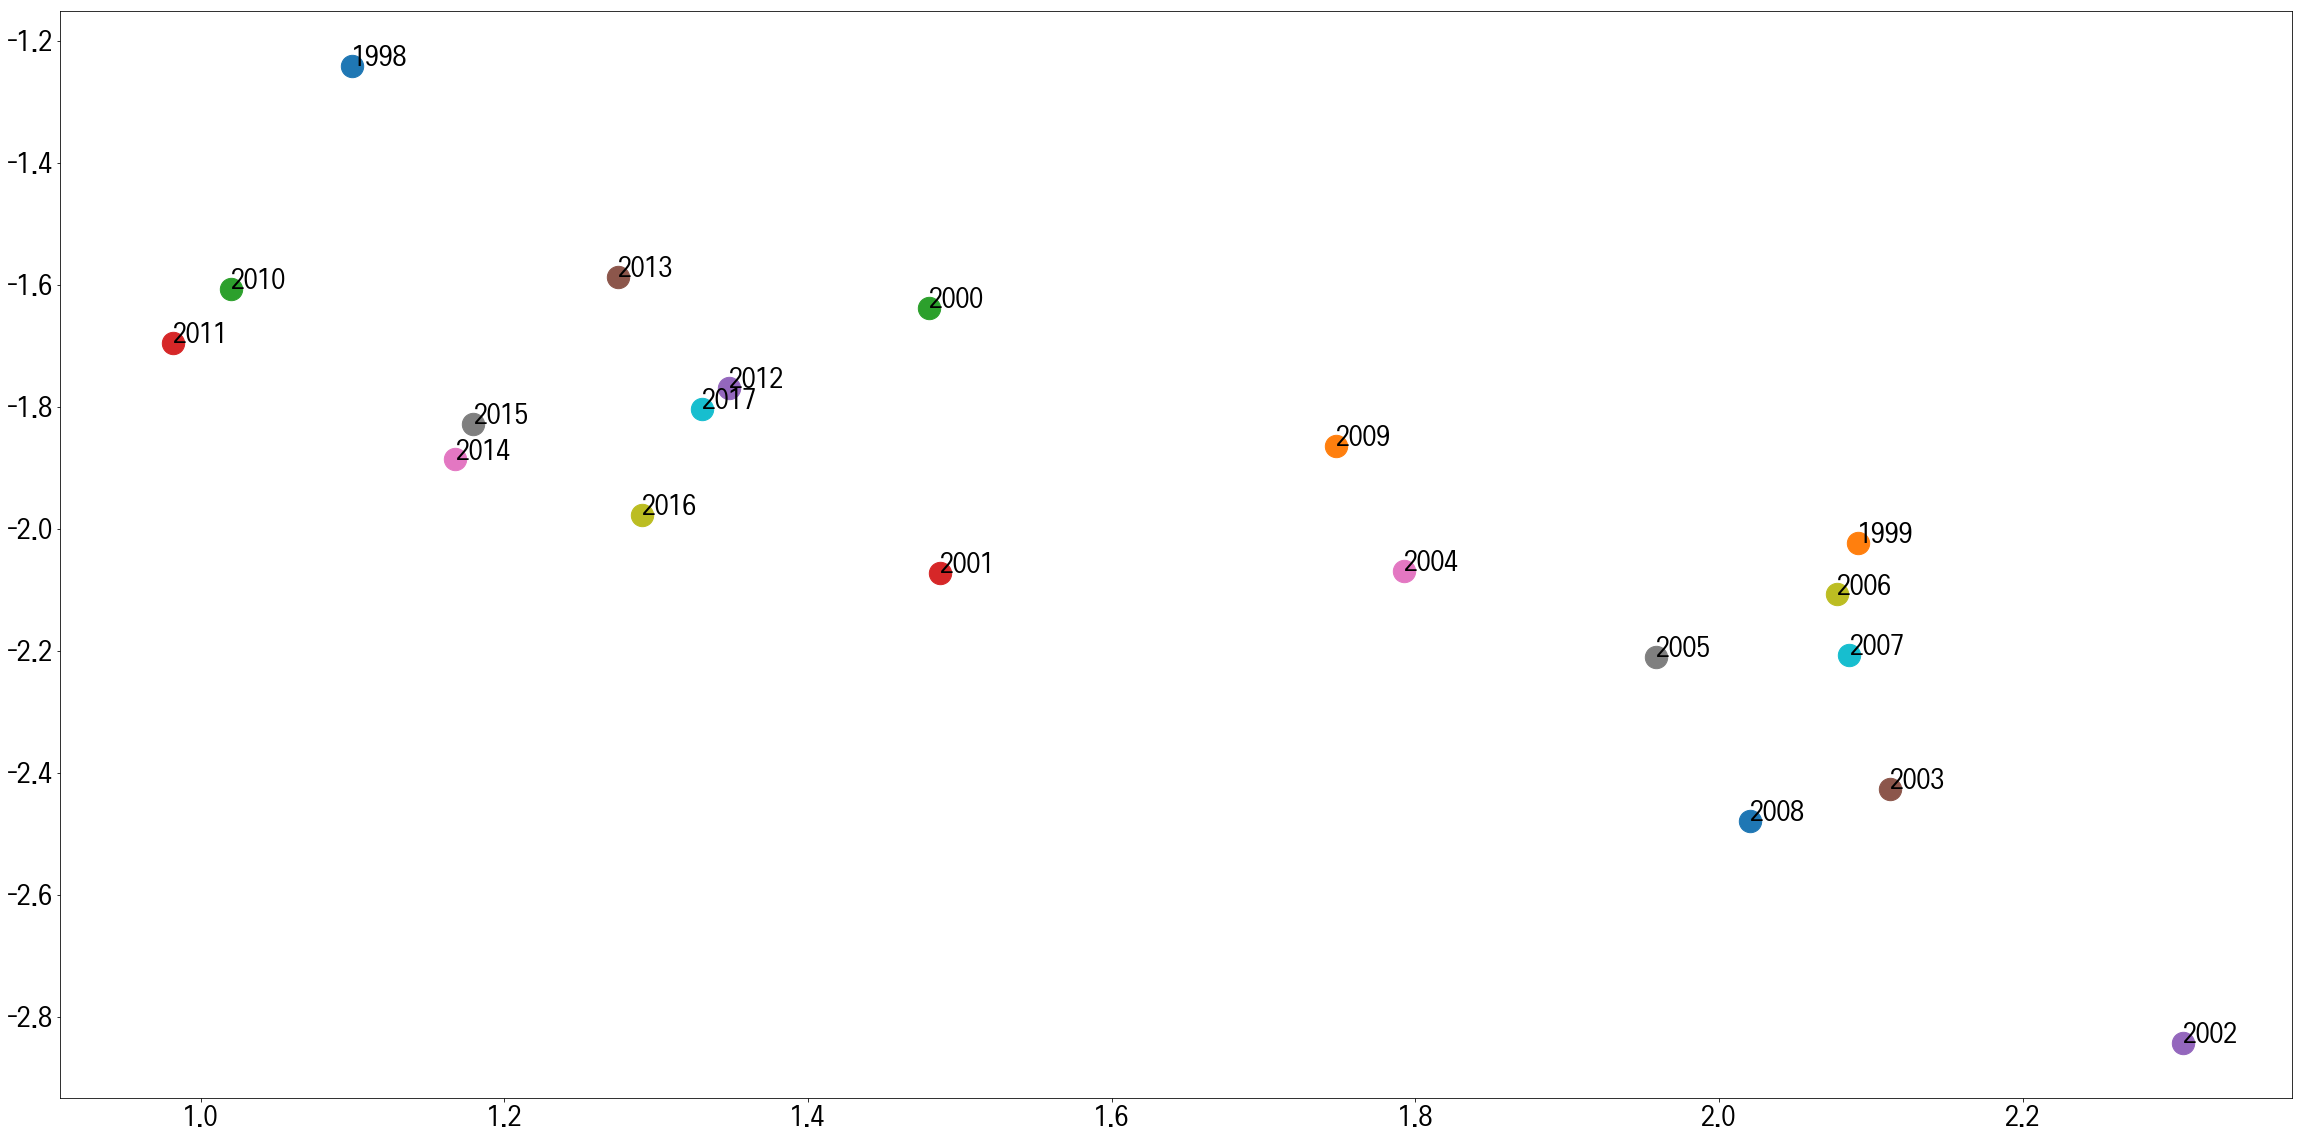

In [118]:
doc = []

for i in range(len(document)-1):
    doc.append(document[i][:2])
    
fig = plt.figure()
fig.set_size_inches(40, 20)
ax = fig.add_subplot(1, 1, 1)

year_index = [x for x in range(1998, 2020)]

for i in range(len(doc)-1):
    ax.scatter(doc[i][0], doc[i][1], s=500)
    ax.annotate(year_index[i], (doc[i][0], doc[i][1]))

## 5차원으로 줄인 새 pickle을 이용해서 그냥 plot & 차이 plot

In [165]:
with open(r'C:/Users/parks/Desktop/models_5차원/samjeon_doc2vec_nouns_5.pkl', 'rb') as f:
    doc2vec_model_nouns_5 = pickle.load(f)
with open(r'C:/Users/parks/Desktop/models_5차원/samjeon_doc2vec_5.pkl', 'rb') as f:
    doc2vec_model_5 = pickle.load(f)

In [166]:
noun_model_5 = doc2vec_model_nouns_5

document_5 = [noun_model_5.docvecs[i] for i in range(0, len(noun_model_5.docvecs))]# len = 22

df1 = pd.DataFrame(document_5)


In [143]:
doc5 = []


for i in range(len(document_5)-1):
    doc5.append(document_5[i]-document_5[i+1])
    
df2 = pd.DataFrame(doc5)

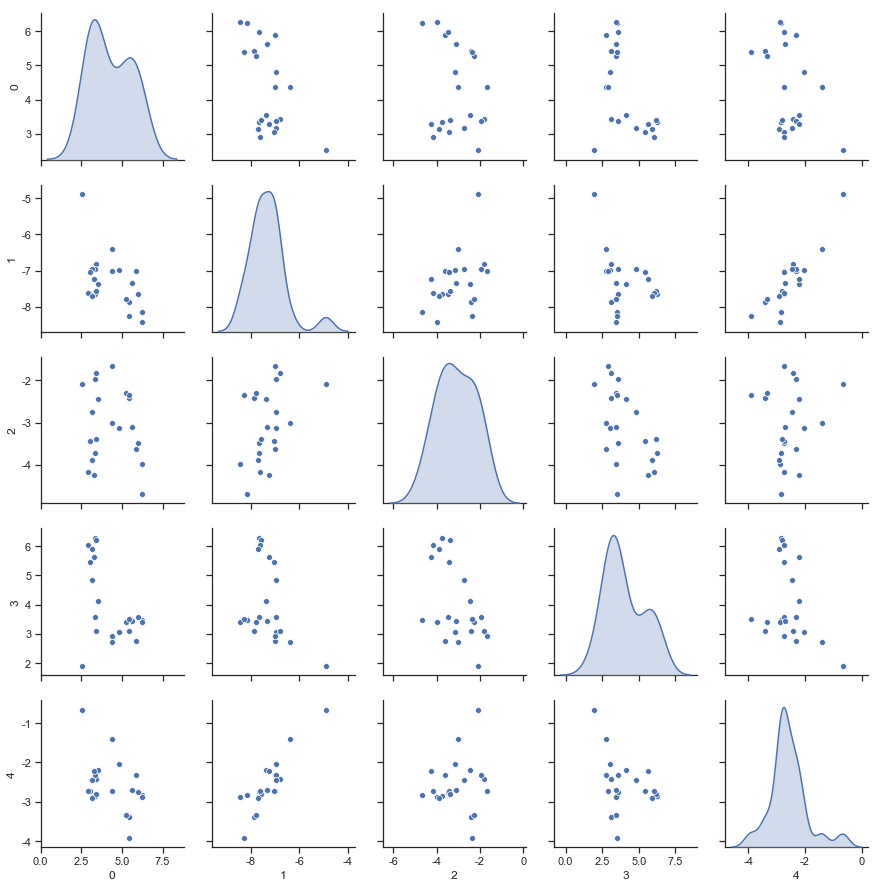

In [144]:
import seaborn as sns

sns.set(style="ticks")

sns.pairplot(df1, diag_kind="kde")

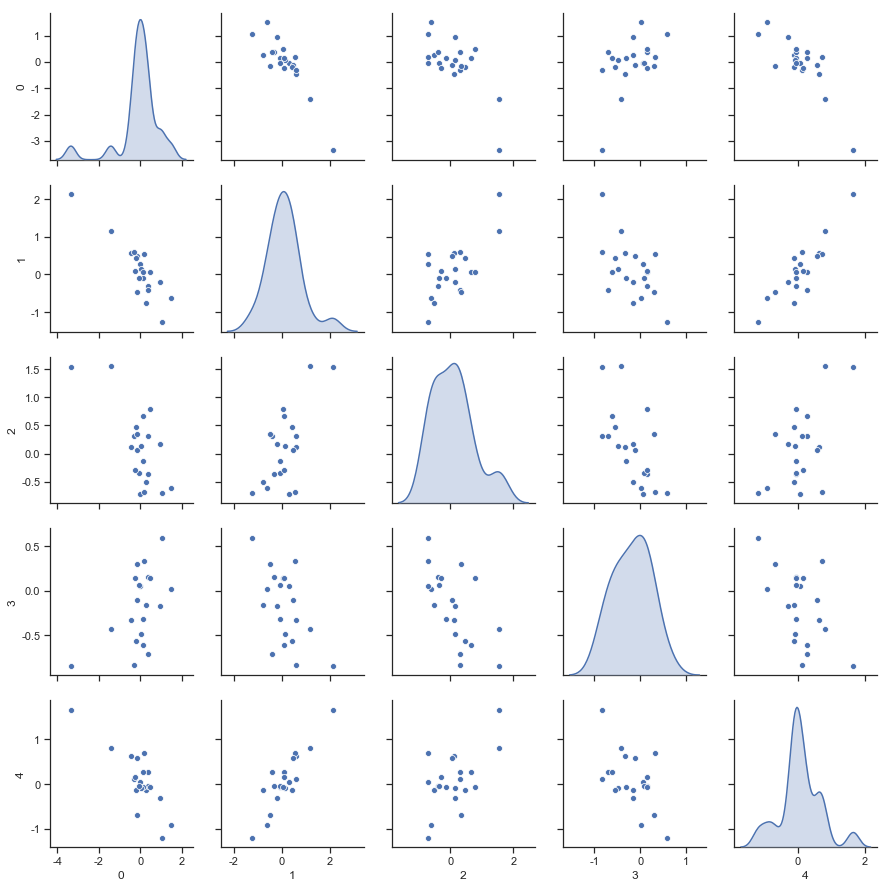

In [145]:
import seaborn as sns

sns.set(style="ticks")

sns.pairplot(df2, diag_kind="kde")

## 5차원으로 줄인 pickle을 PCA & TSNE

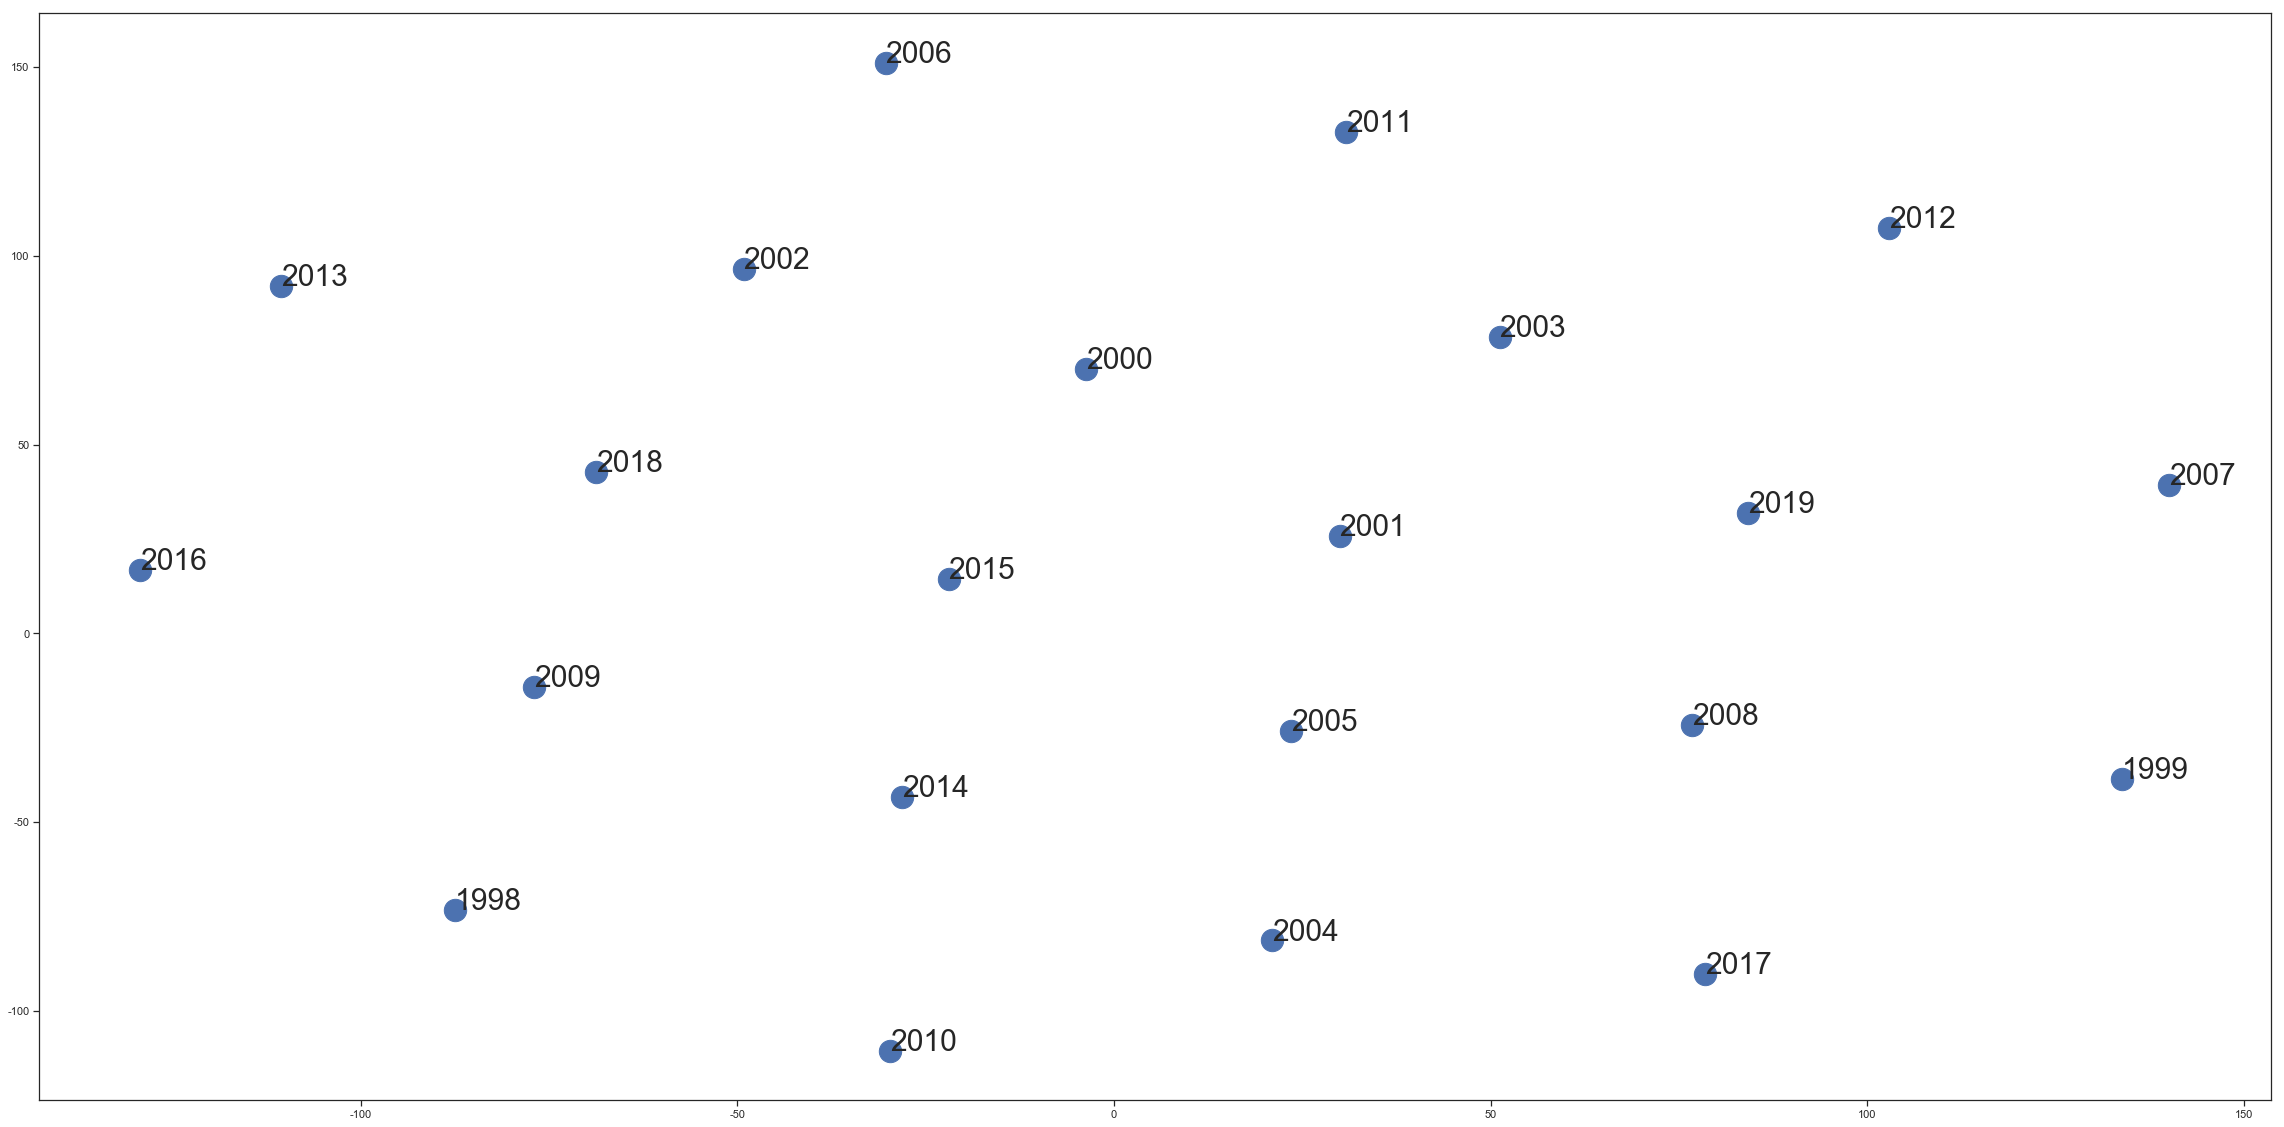

In [148]:
#TSNE


year_index = [x for x in range(1998, 2020)]

noun_model_5 = doc2vec_model_nouns_5

document = [noun_model_5.docvecs[i] for i in range(0, len(noun_model_5.docvecs))]


tsne = TSNE(n_components=2)

X_tsne = tsne.fit_transform(document)

df = pd.DataFrame(X_tsne, index=year_index, columns=['x', 'y'])


fig = plt.figure()
fig.set_size_inches(40, 20)
ax = fig.add_subplot(1, 1, 1)

ax.scatter(df['x'], df['y'], s=500)

for word, pos in df.iterrows():
    ax.annotate(word, pos, fontsize=30)


    
    

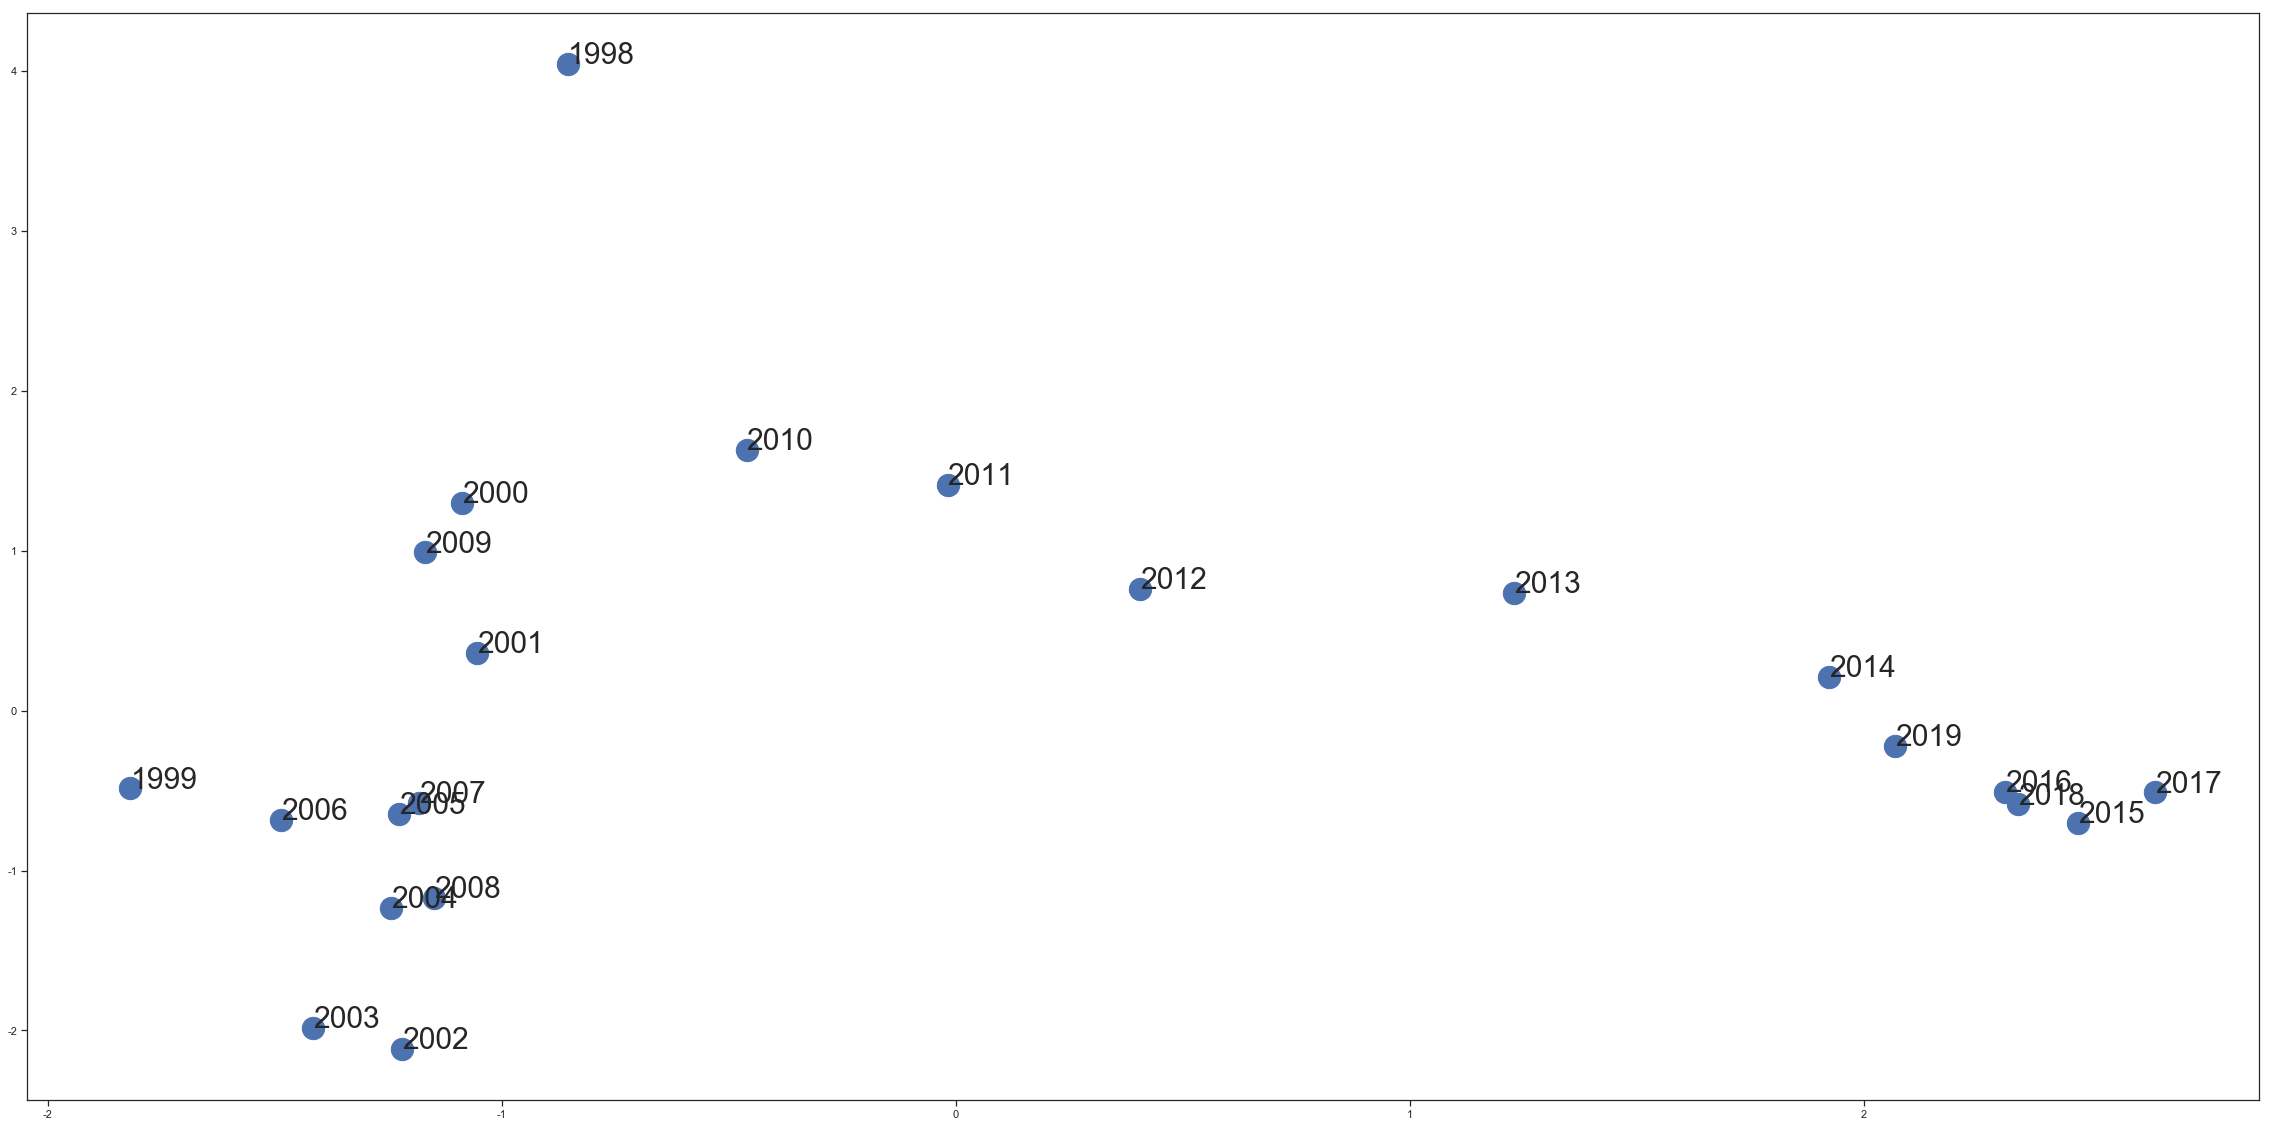

In [149]:
#PCA

year_index = [x for x in range(1998, 2020)]

noun_model_5 = doc2vec_model_nouns_5

document = [noun_model_5.docvecs[i] for i in range(0, len(noun_model_5.docvecs))]



PCA = sklearn.decomposition.PCA(n_components=2)
X_PCA = PCA.fit_transform(document)


df = pd.DataFrame(X_PCA, index=year_index, columns=['x', 'y'])


fig = plt.figure()
fig.set_size_inches(40, 20)
ax = fig.add_subplot(1, 1, 1)

ax.scatter(df['x'], df['y'], s=500)

for word, pos in df.iterrows():
    ax.annotate(word, pos, fontsize=30)

    

In [160]:
def produce_pca(model):
    docvecs = [model.docvecs[i] for i in range(0, len(model.docvecs))]
    pca = sklearn.decomposition.PCA(n_components=2)
    pca.fit(docvecs)
    reduced_docvecs = pca.transform(docvecs)
    matplotlib.rcParams["font.size"] = 30
    fig, ax = plt.subplots(figsize=(40,30))
    ax.scatter(reduced_docvecs[:,0], reduced_docvecs[:,1], s = 500)

    for i, txt in enumerate(range(1998,2020)):
        ax.annotate(txt, (reduced_docvecs[:,0][i], reduced_docvecs[:,1][i]))

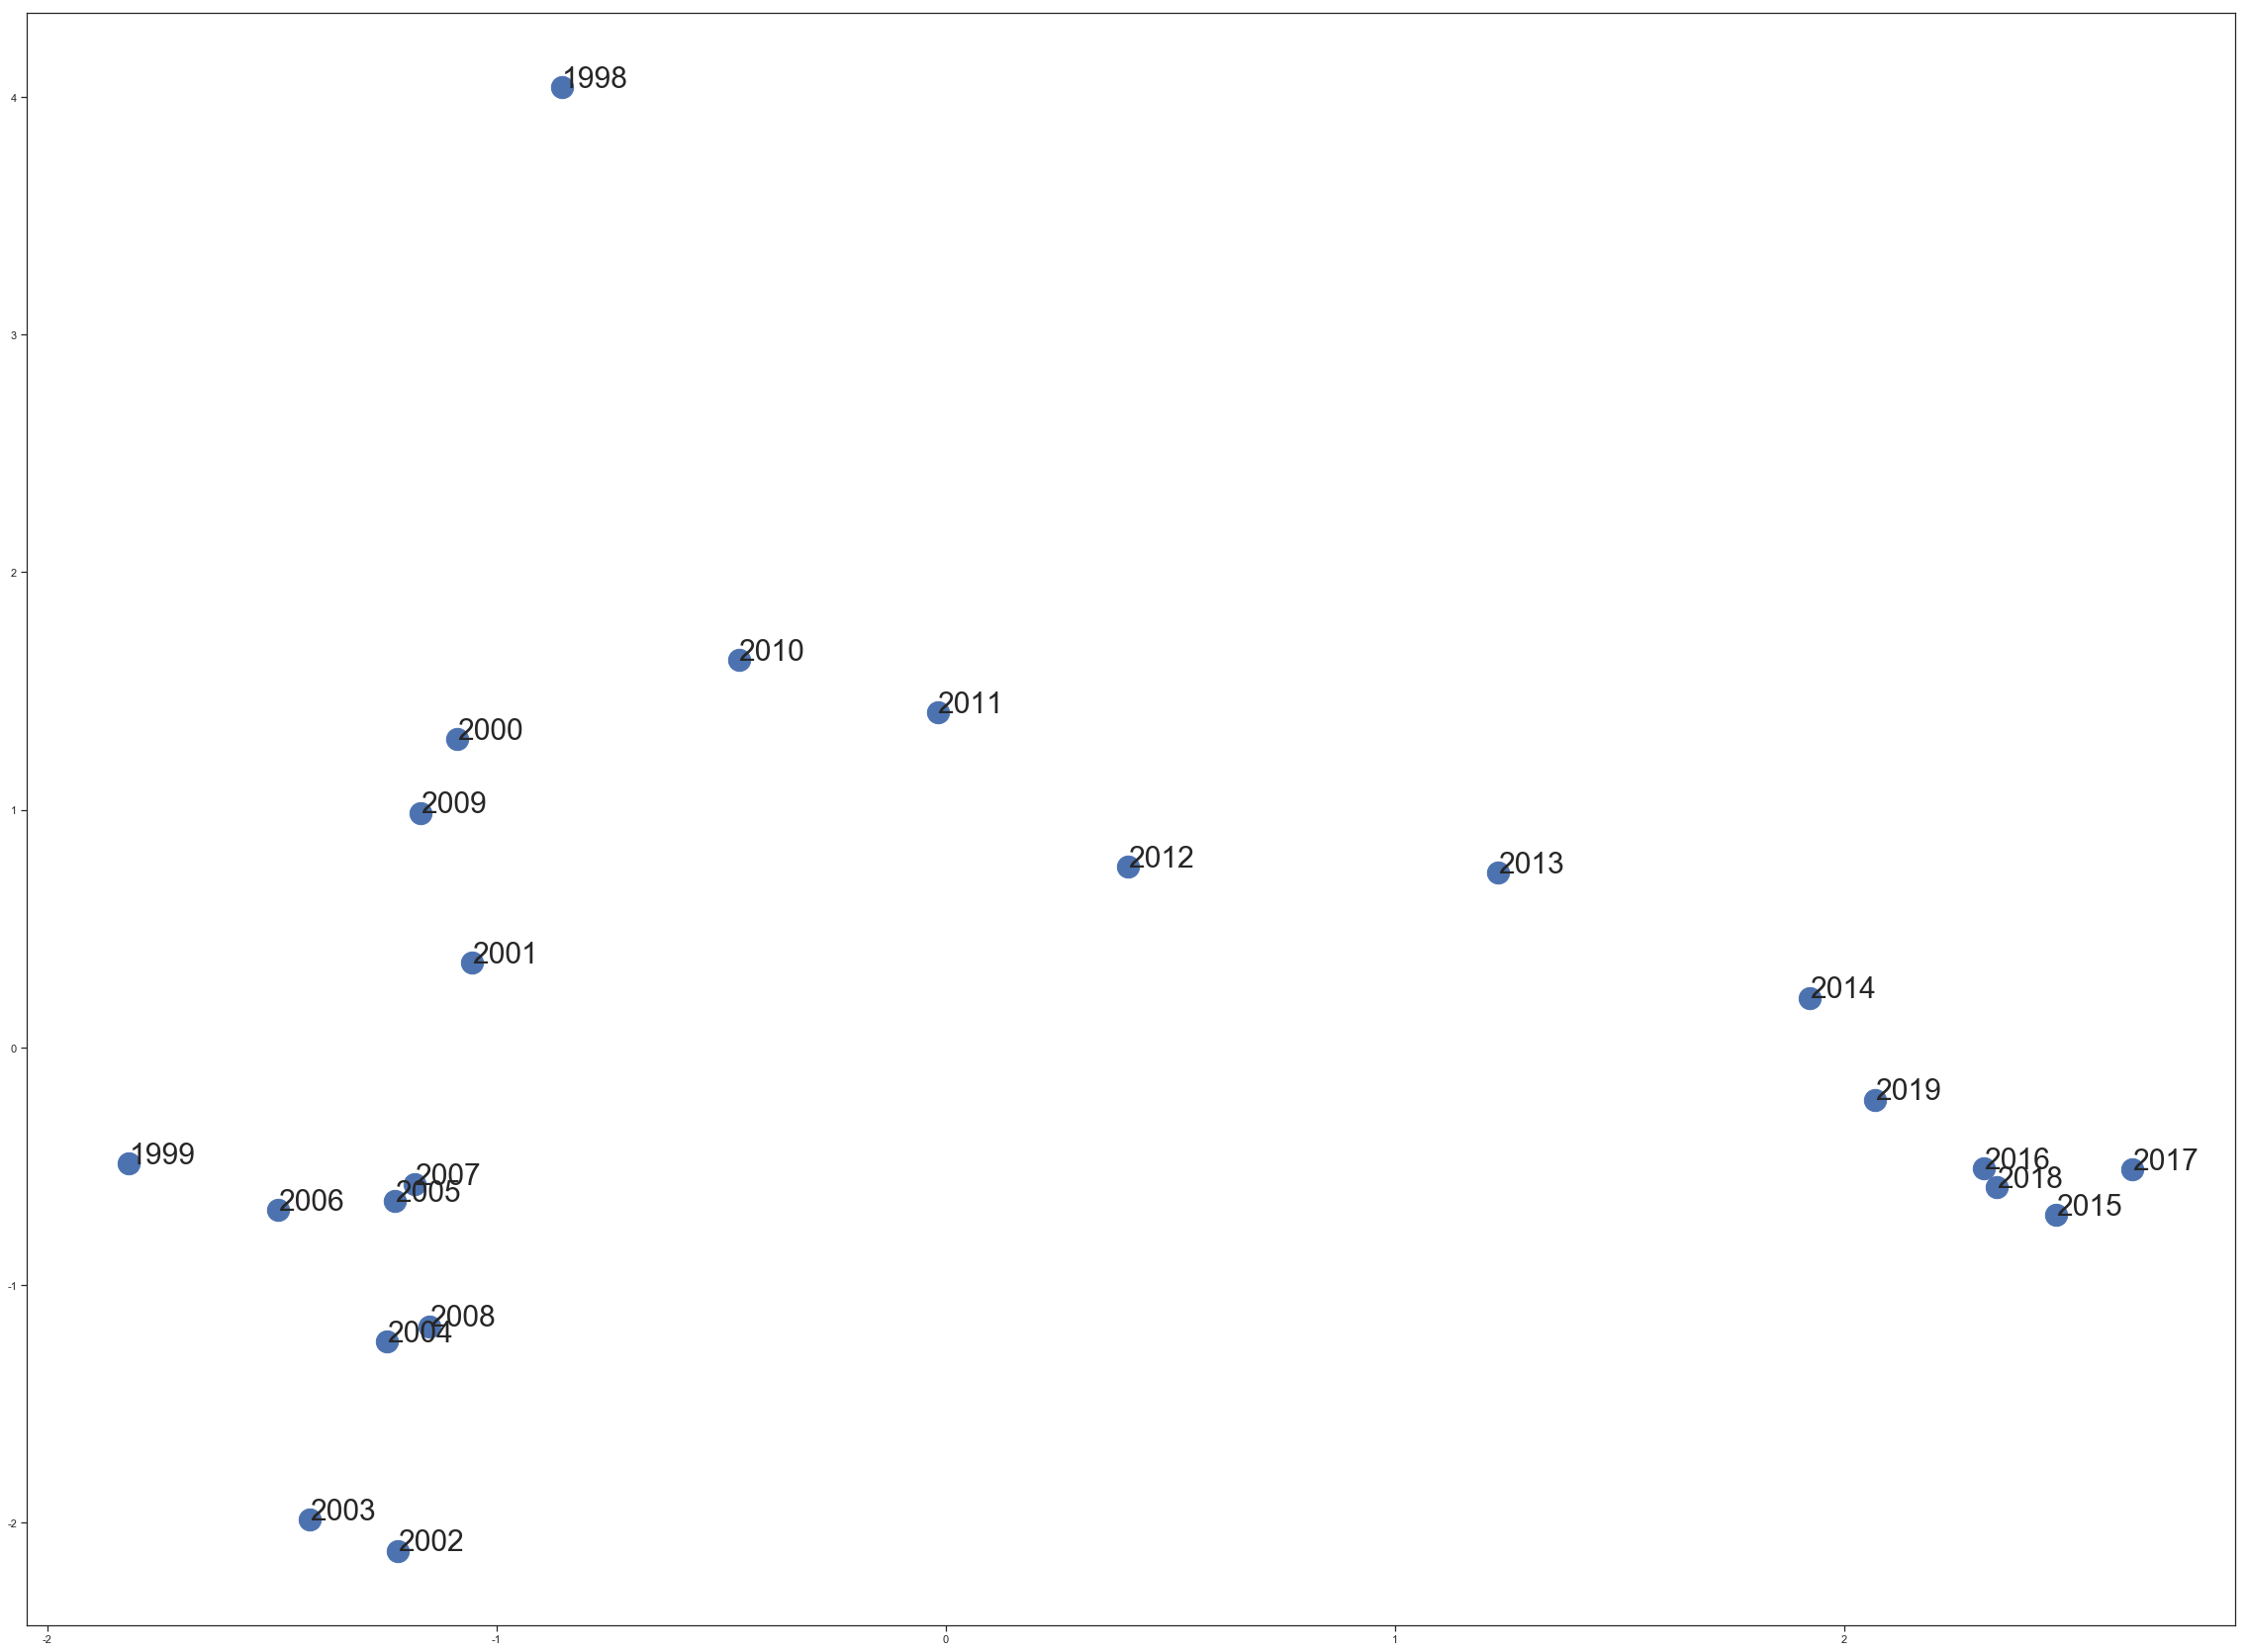

In [161]:
produce_pca(noun_model_5)

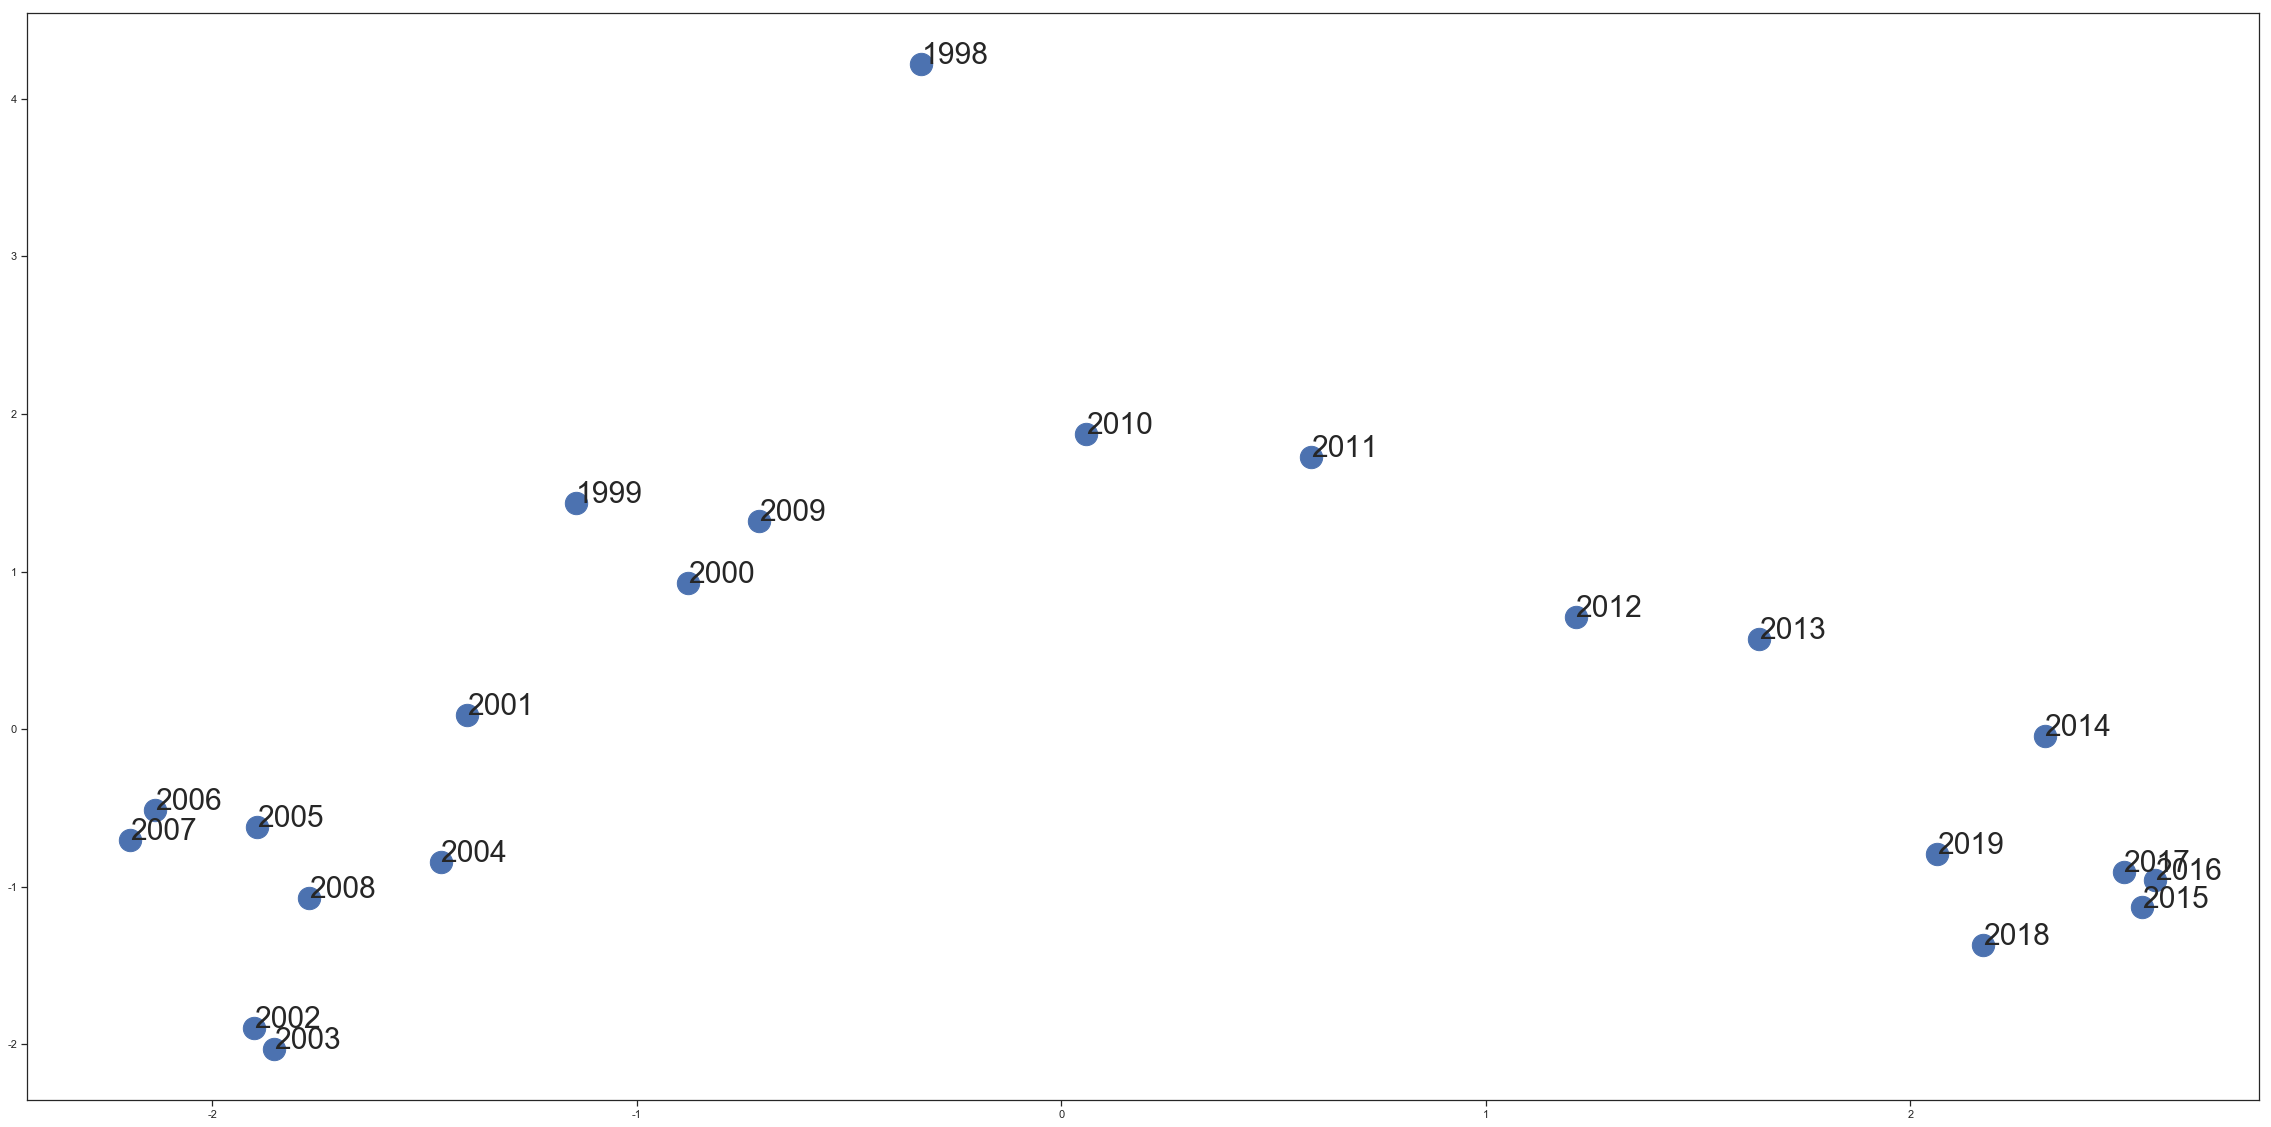

In [153]:
model_5 = doc2vec_model_5


year_index = [x for x in range(1998, 2020)]

document = [model_5.docvecs[i] for i in range(0, len(model_5.docvecs))]



PCA = sklearn.decomposition.PCA(n_components=2)
X_PCA = PCA.fit_transform(document)


df = pd.DataFrame(X_PCA, index=year_index, columns=['x', 'y'])


fig = plt.figure()
fig.set_size_inches(40, 20)
ax = fig.add_subplot(1, 1, 1)

ax.scatter(df['x'], df['y'], s=500)

for word, pos in df.iterrows():
    ax.annotate(word, pos, fontsize=30)

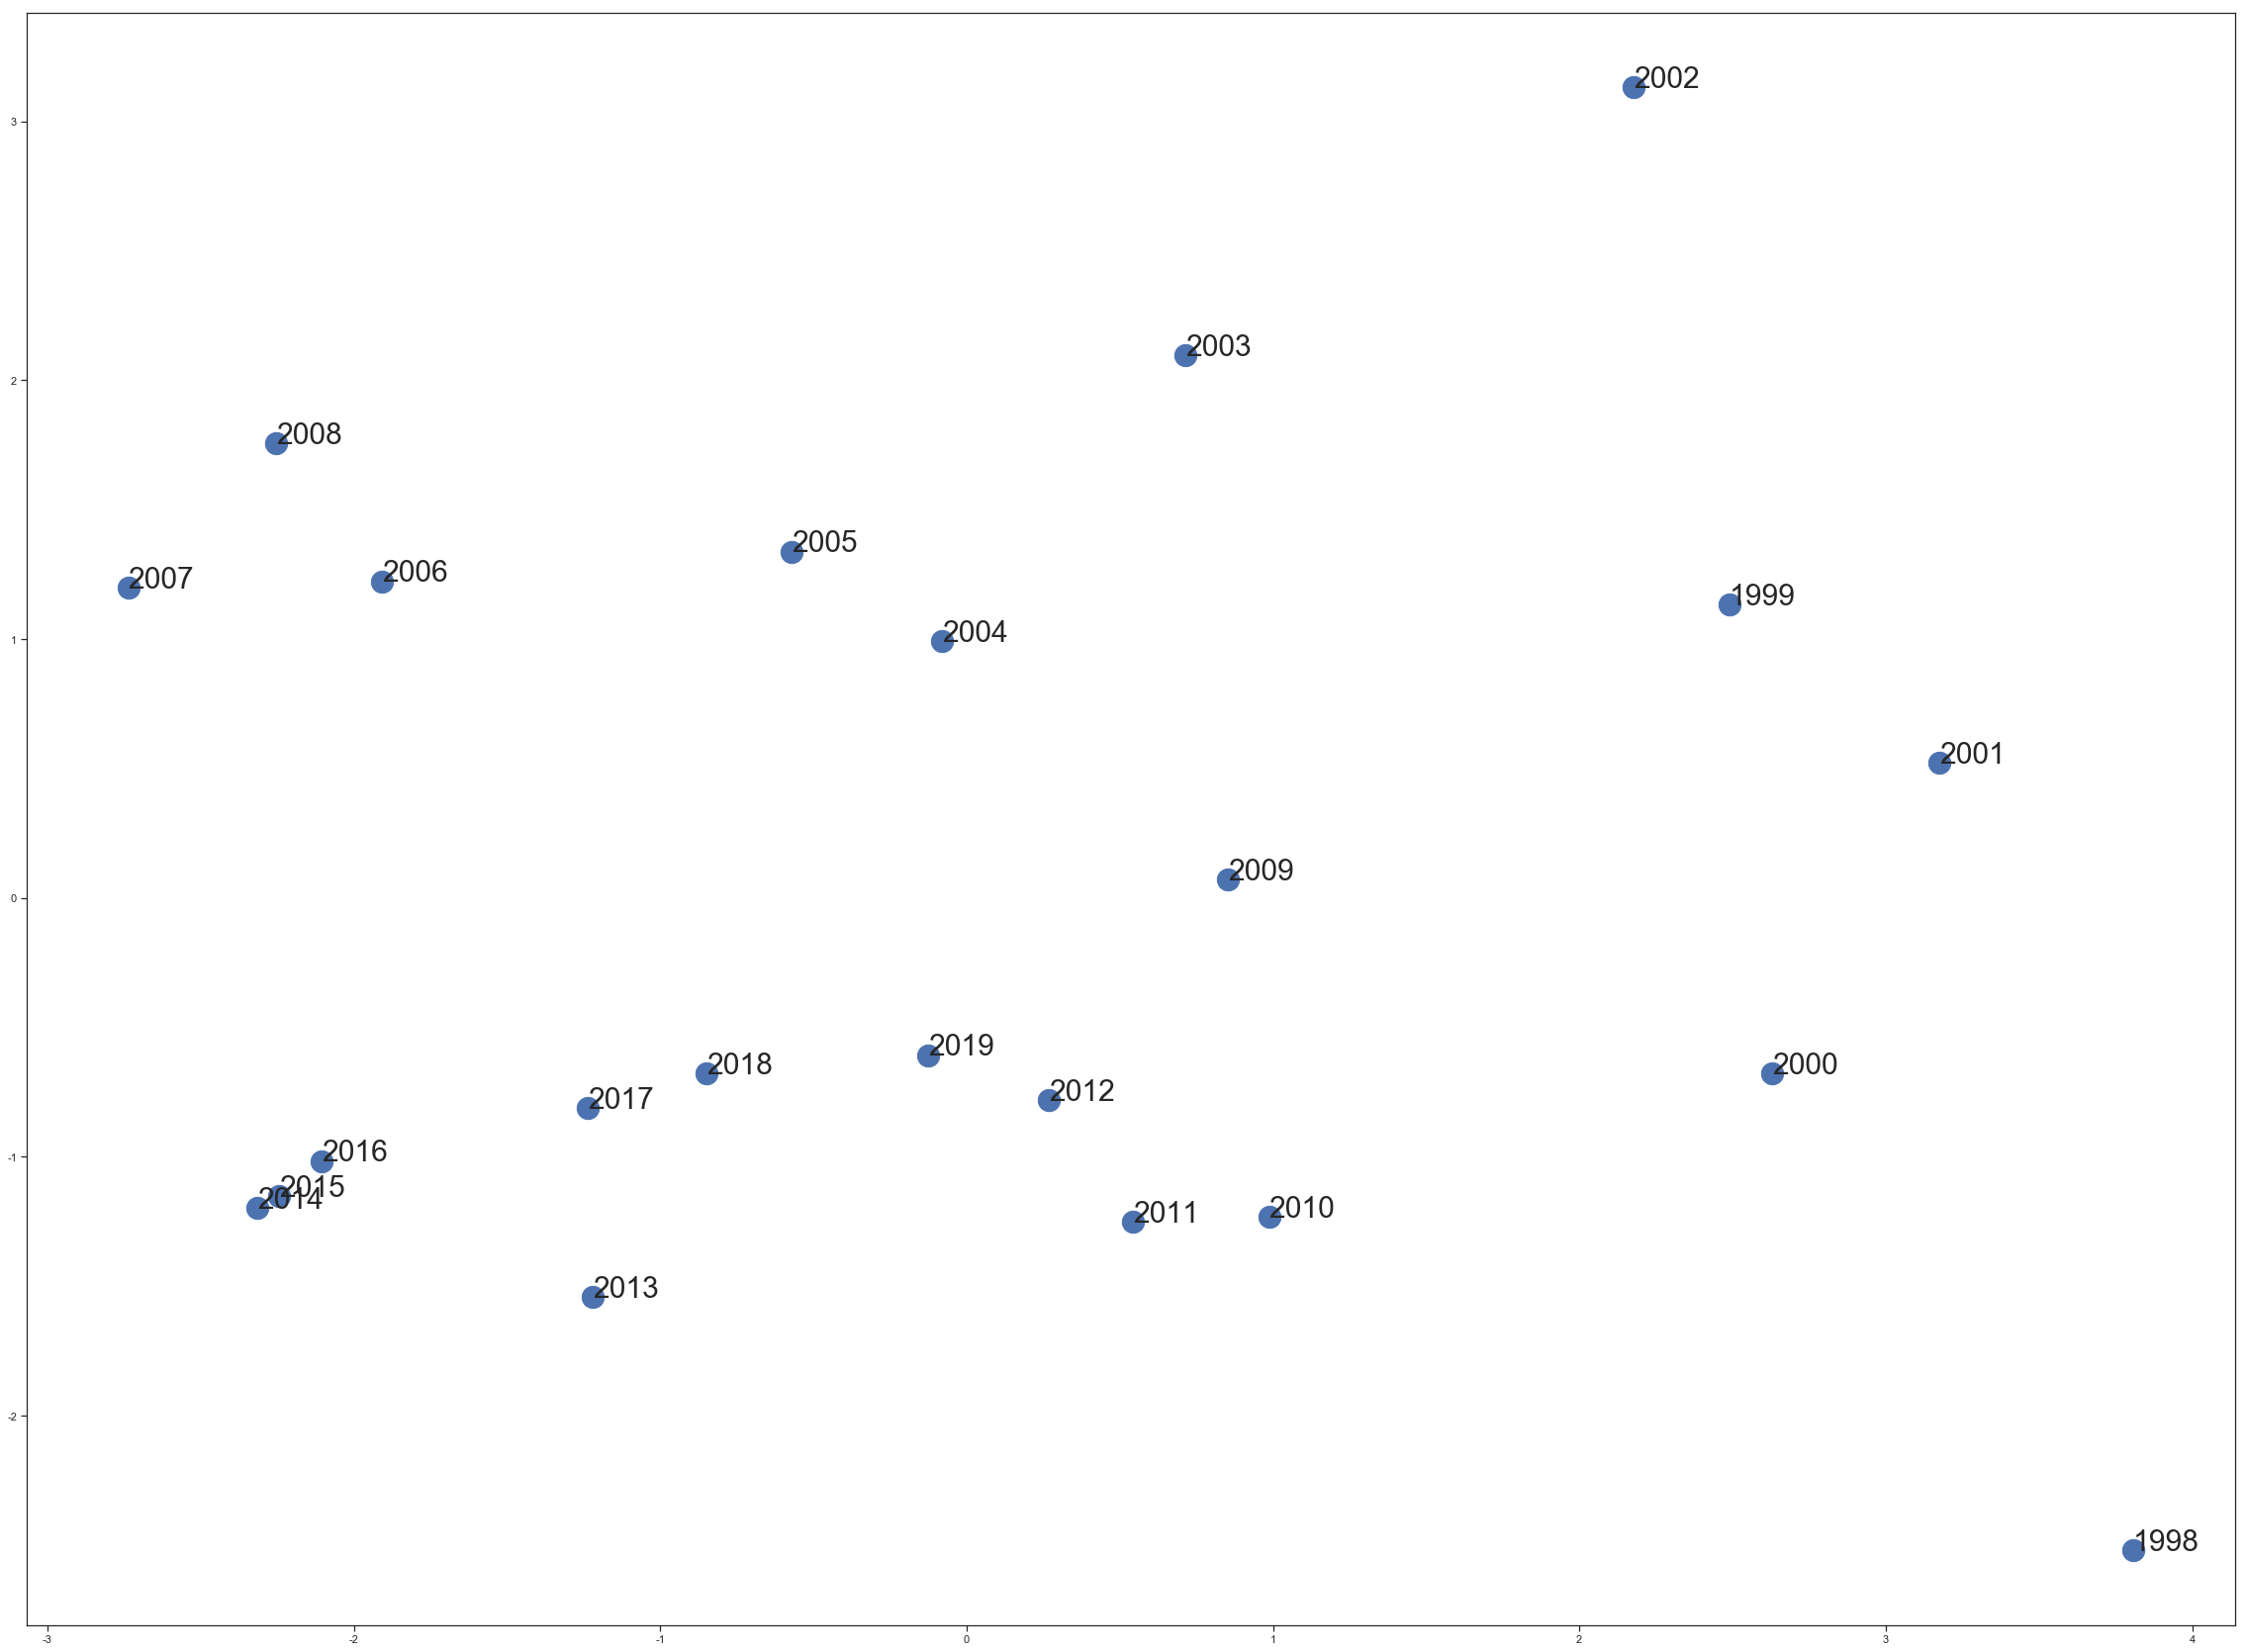

In [167]:
produce_pca(doc2vec_model_nouns)

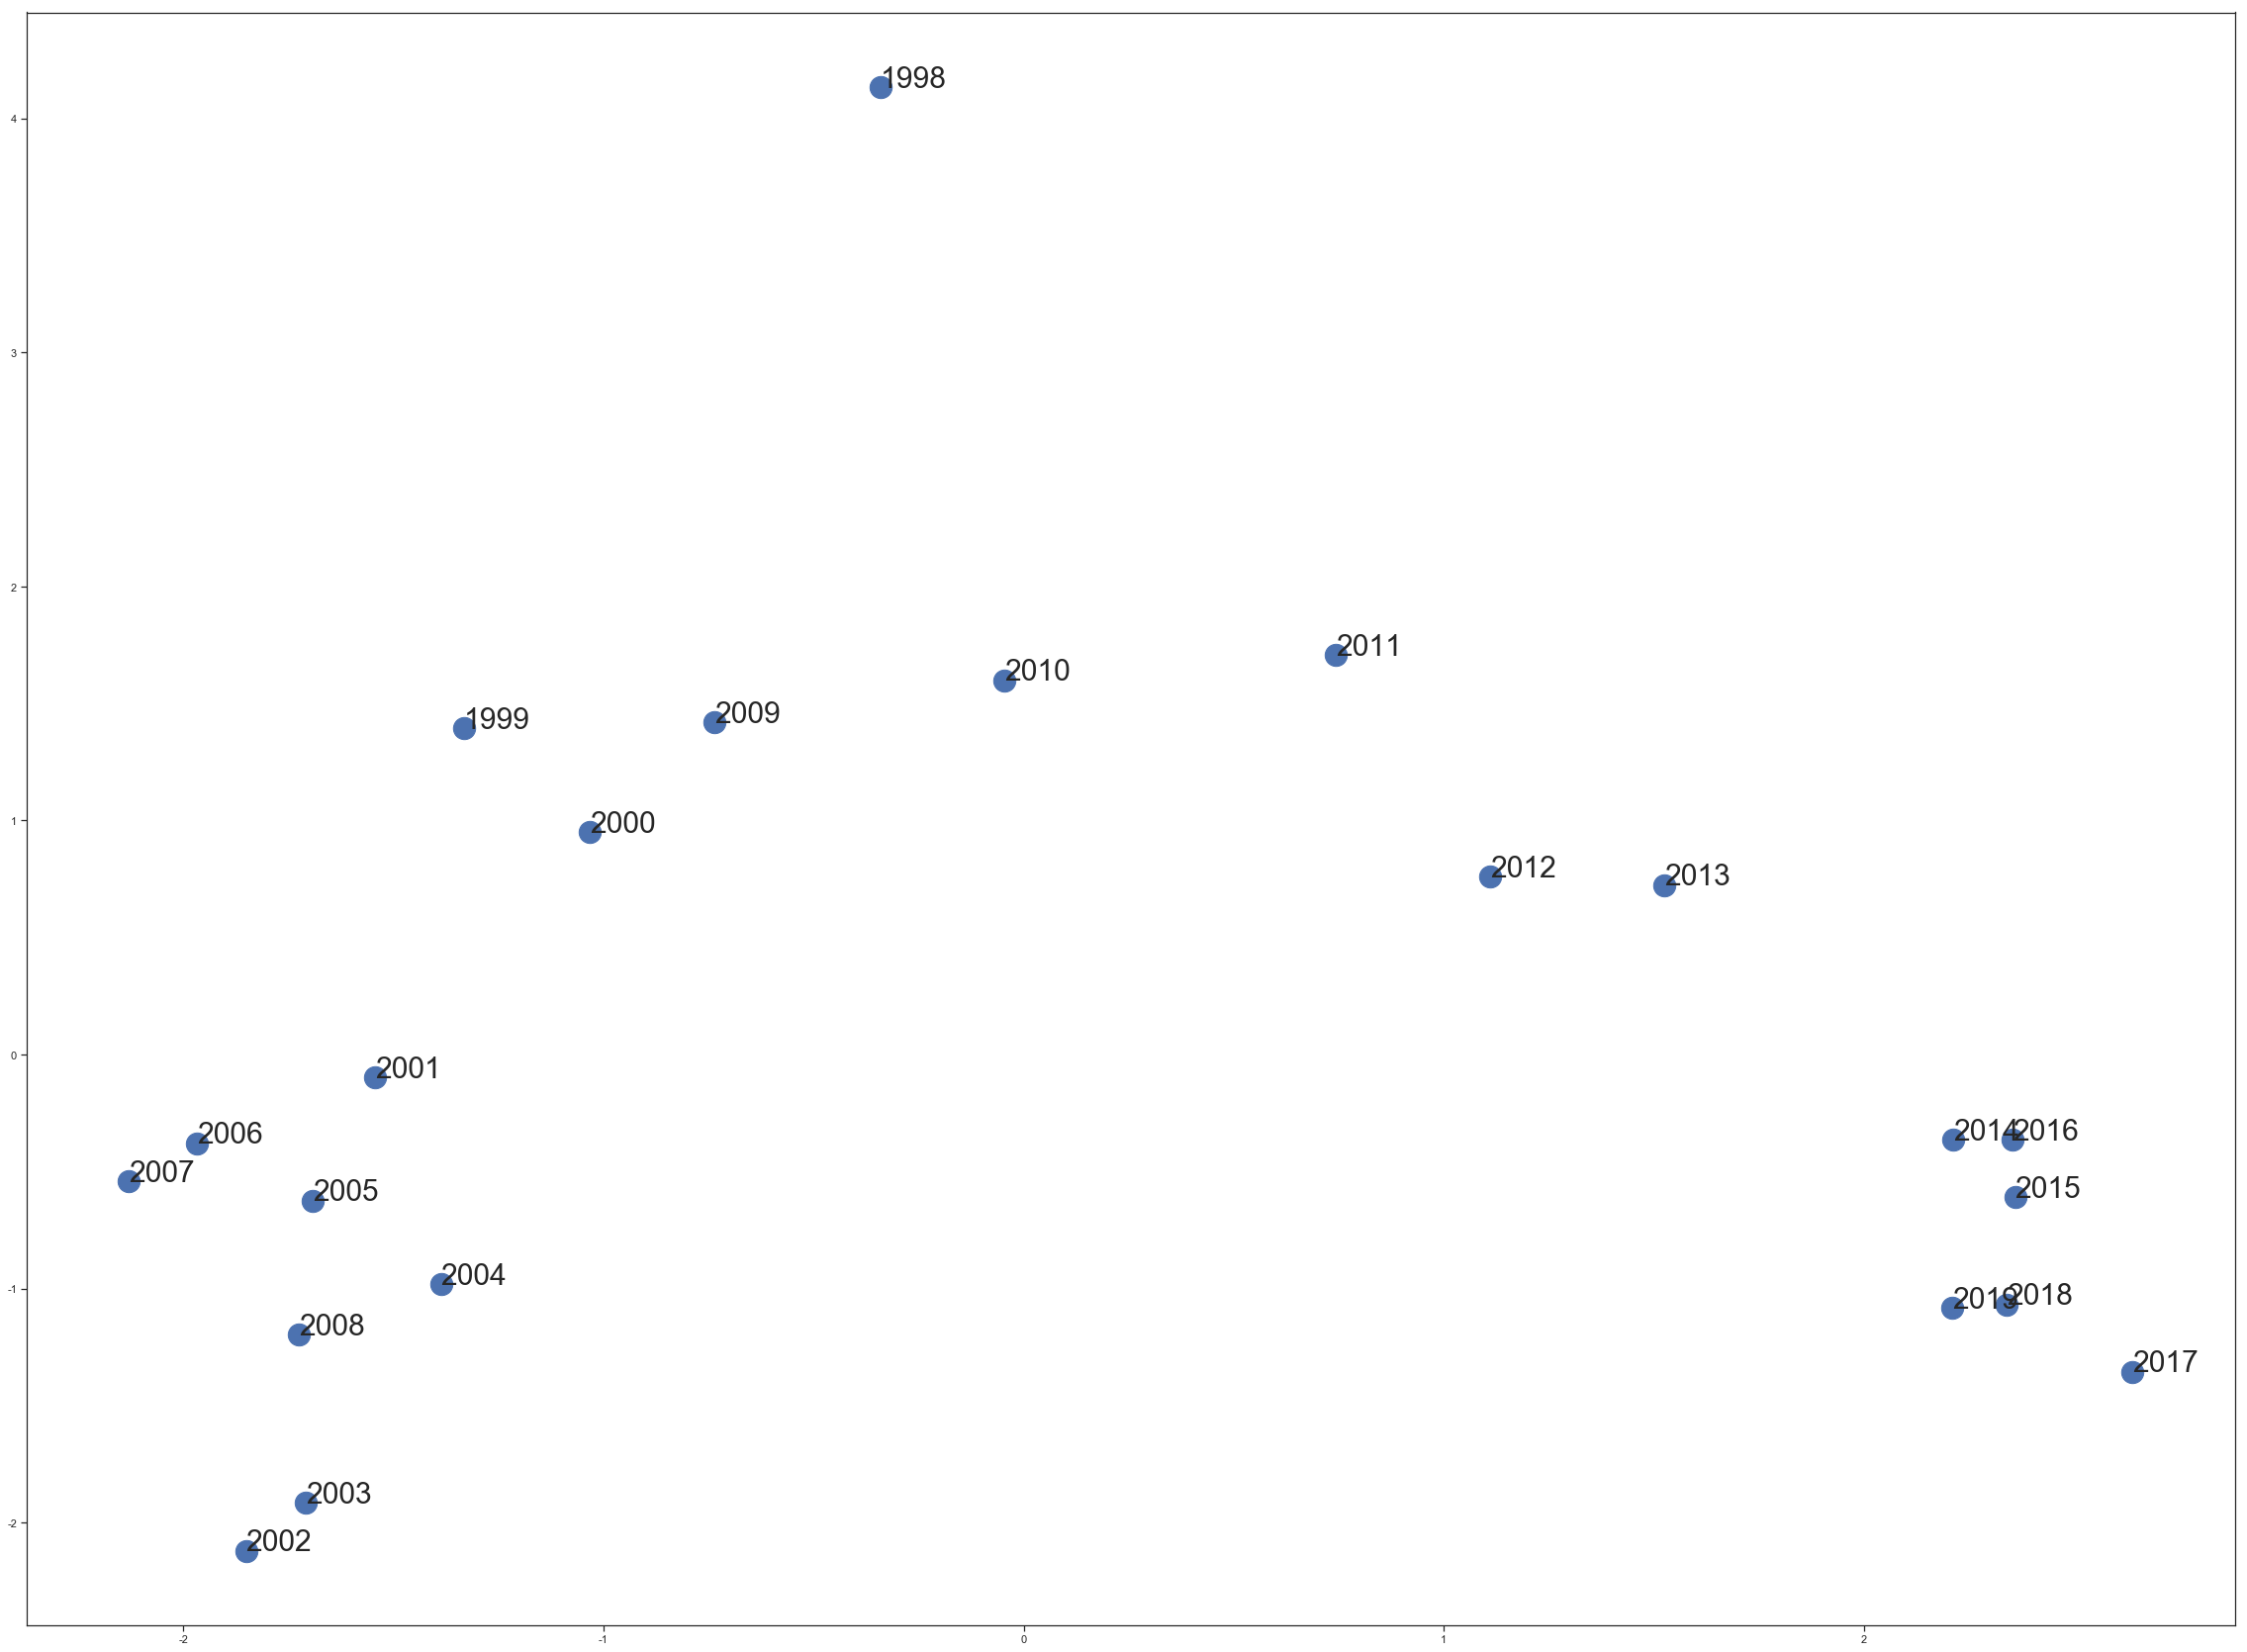

In [168]:
produce_pca(doc2vec_model_5)

## Document만 TSNE로

In [ ]:
# 1000차원, 100차원, 5차원

year_index = [x for x in range(1998, 2020)]

noun_model_5 = doc2vec_model_nouns_5

document = [noun_model_5.docvecs[i] for i in range(0, len(noun_model_5.docvecs))]


tsne = TSNE(n_components=2)

X_tsne = tsne.fit_transform(document)

df = pd.DataFrame(X_tsne, index=year_index, columns=['x', 'y'])


fig = plt.figure()
fig.set_size_inches(40, 20)
ax = fig.add_subplot(1, 1, 1)

ax.scatter(df['x'], df['y'], s=500)

for word, pos in df.iterrows():
    ax.annotate(word, pos, fontsize=30)



In [181]:
with open(r'C:/Users/parks/Desktop/models_5차원/samjeon_doc2vec_5.pkl', 'rb') as f:
    doc2vec_model_5 = pickle.load(f)

with open(r'C:/Users/parks/Desktop/models_5차원/samjeon_doc2vec_1000.pkl', 'rb') as f:
    doc2vec_model_1000 = pickle.load(f)
    
with open(r'C:/Users/parks/Desktop/models_5차원/samjeon_doc2vec.pkl', 'rb') as f:
    doc2vec_model = pickle.load(f)
    

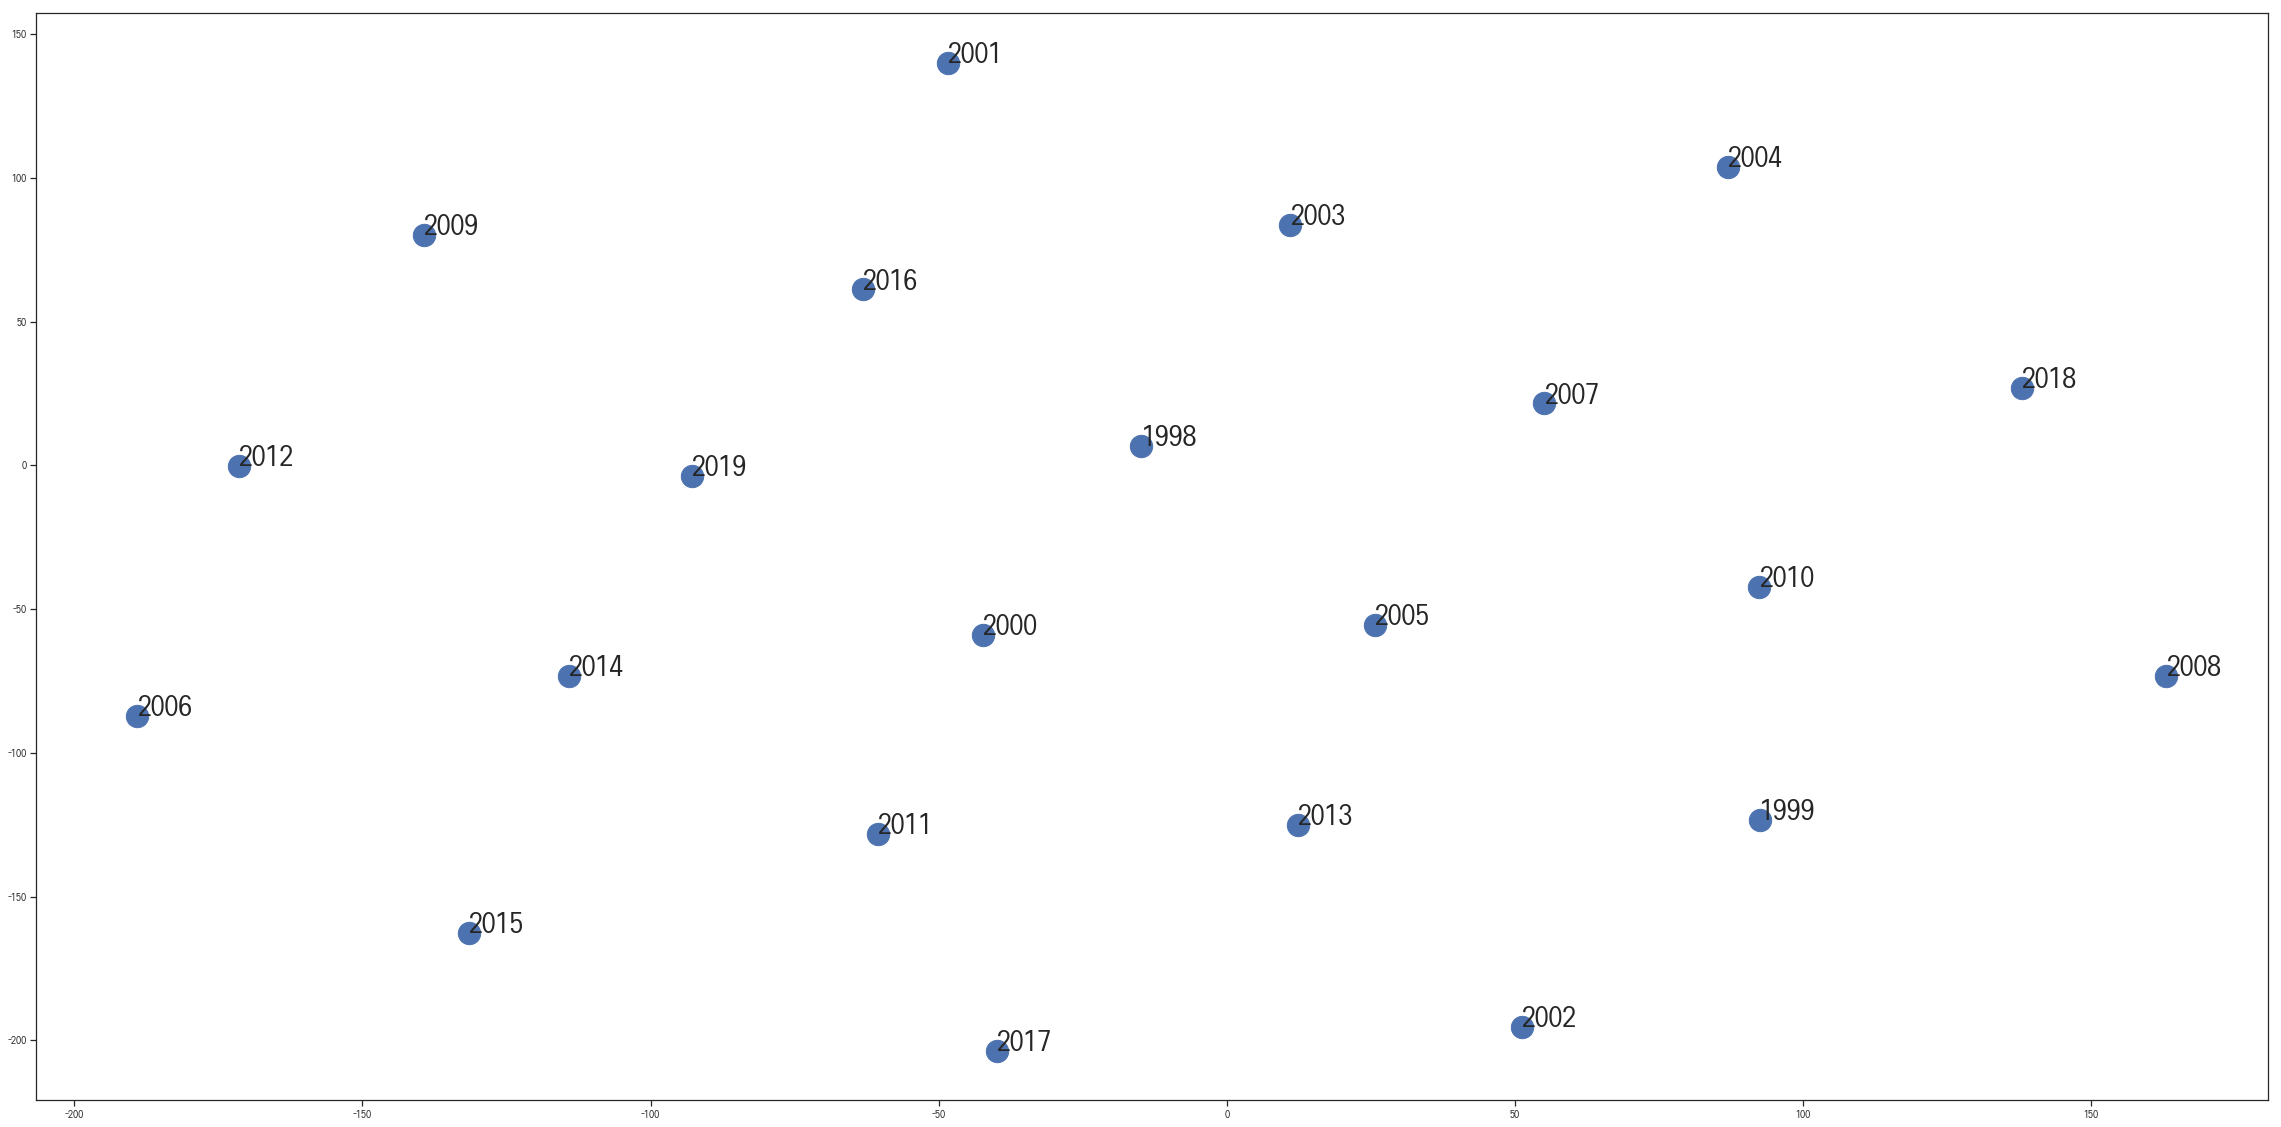

In [183]:
#100차원

year_index = [x for x in range(1998, 2020)]

model_100 = doc2vec_model

document = [model_100.docvecs[i] for i in range(0, len(model_100.docvecs))]


tsne = TSNE(n_components=2)

X_tsne = tsne.fit_transform(document)

df = pd.DataFrame(X_tsne, index=year_index, columns=['x', 'y'])


fig = plt.figure()
fig.set_size_inches(40, 20)
ax = fig.add_subplot(1, 1, 1)

ax.scatter(df['x'], df['y'], s=500)

for word, pos in df.iterrows():
    ax.annotate(word, pos, fontsize=30)
    
plt.savefig('document_tsne_100', dpi=300)

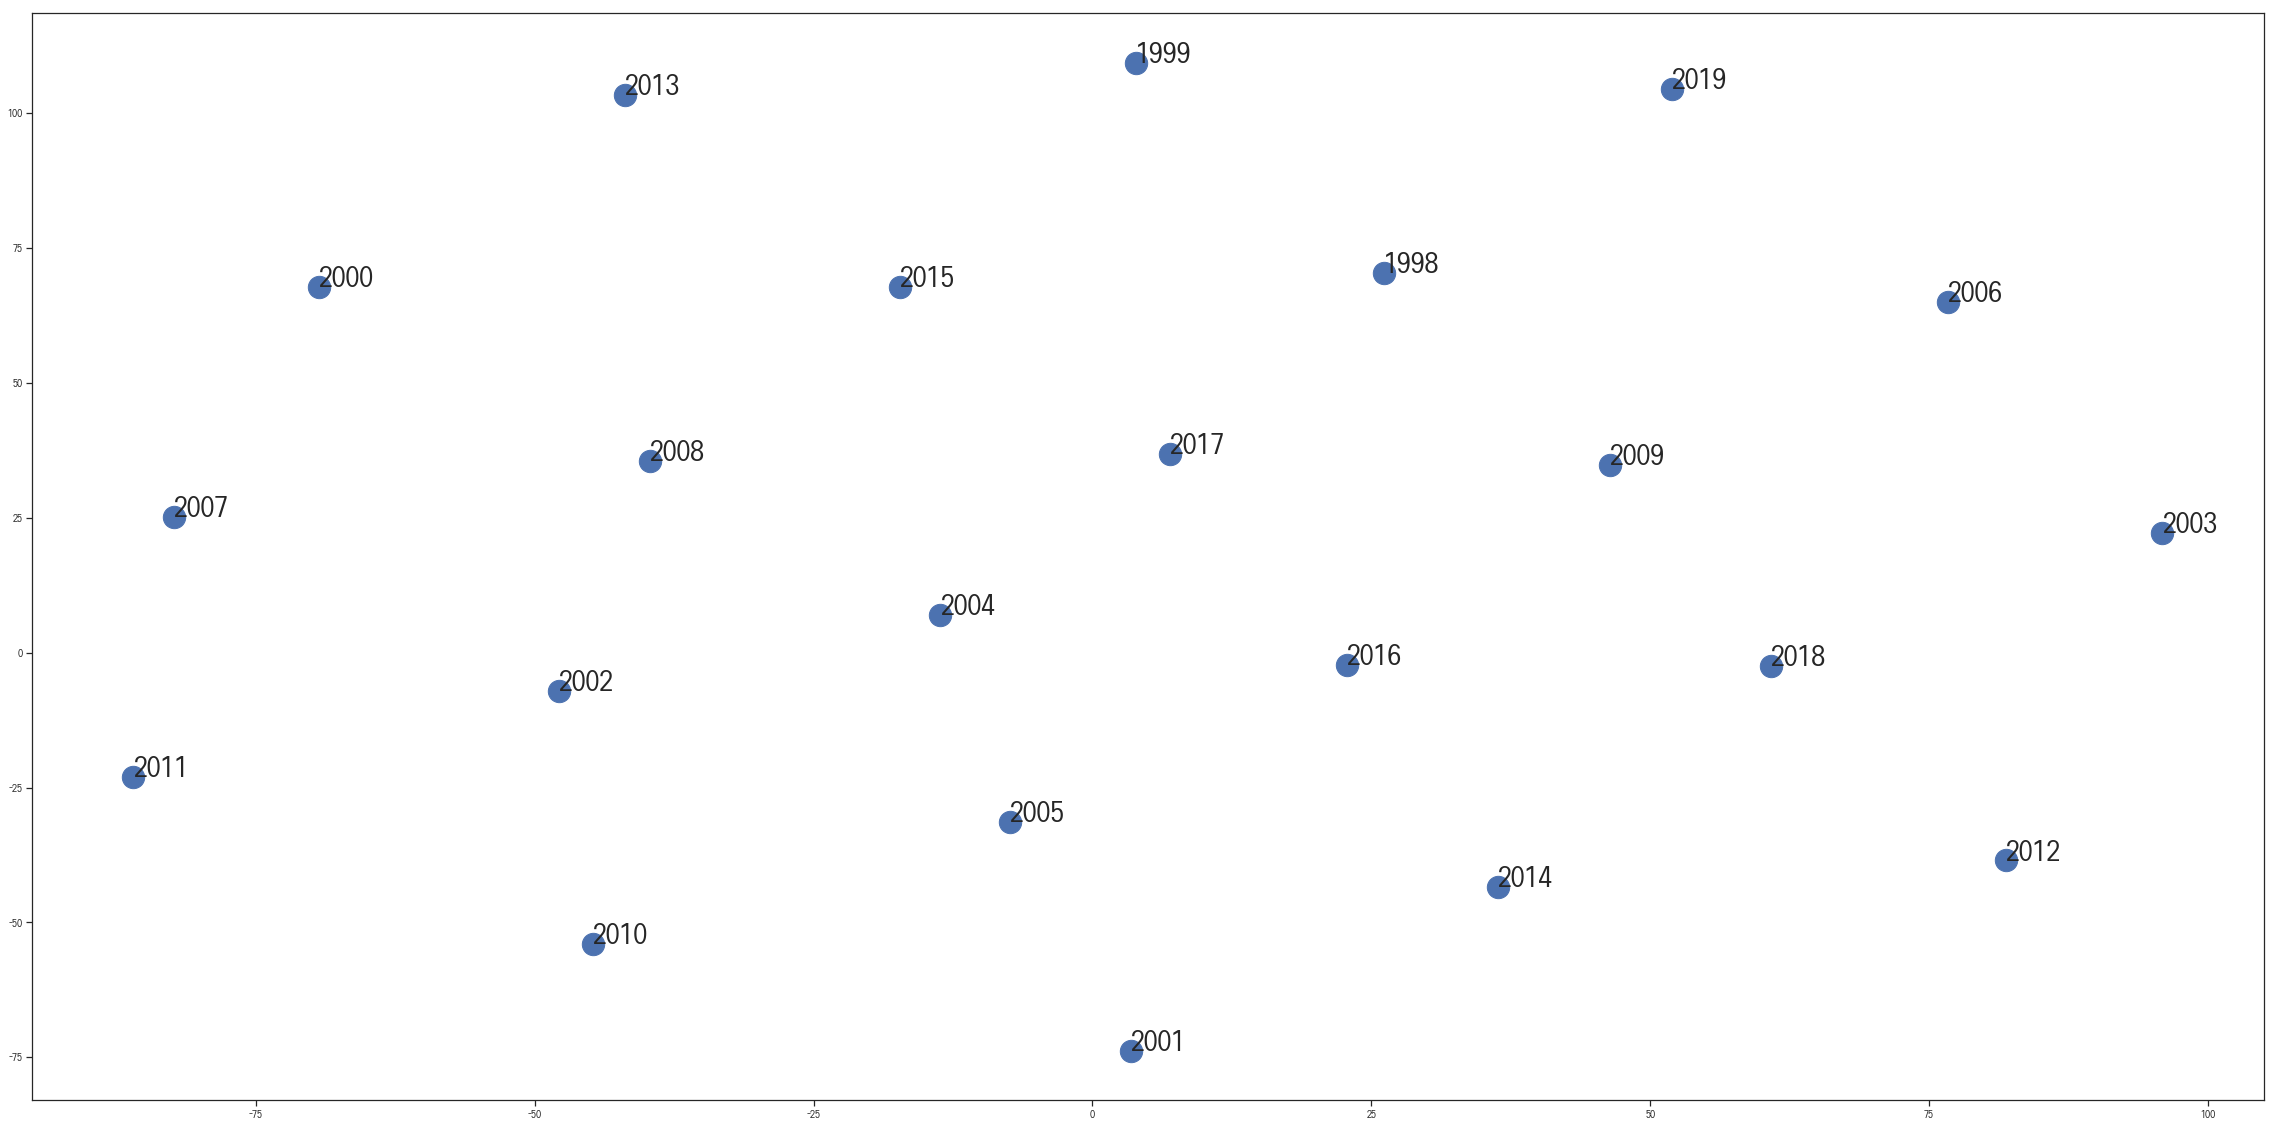

In [184]:
#5차원

year_index = [x for x in range(1998, 2020)]

model_5 = doc2vec_model_5

document = [model_5.docvecs[i] for i in range(0, len(model_5.docvecs))]


tsne = TSNE(n_components=2)

X_tsne = tsne.fit_transform(document)

df = pd.DataFrame(X_tsne, index=year_index, columns=['x', 'y'])


fig = plt.figure()
fig.set_size_inches(40, 20)
ax = fig.add_subplot(1, 1, 1)

ax.scatter(df['x'], df['y'], s=500)

for word, pos in df.iterrows():
    ax.annotate(word, pos, fontsize=30)
    
plt.savefig('document_tsne_5', dpi=300)

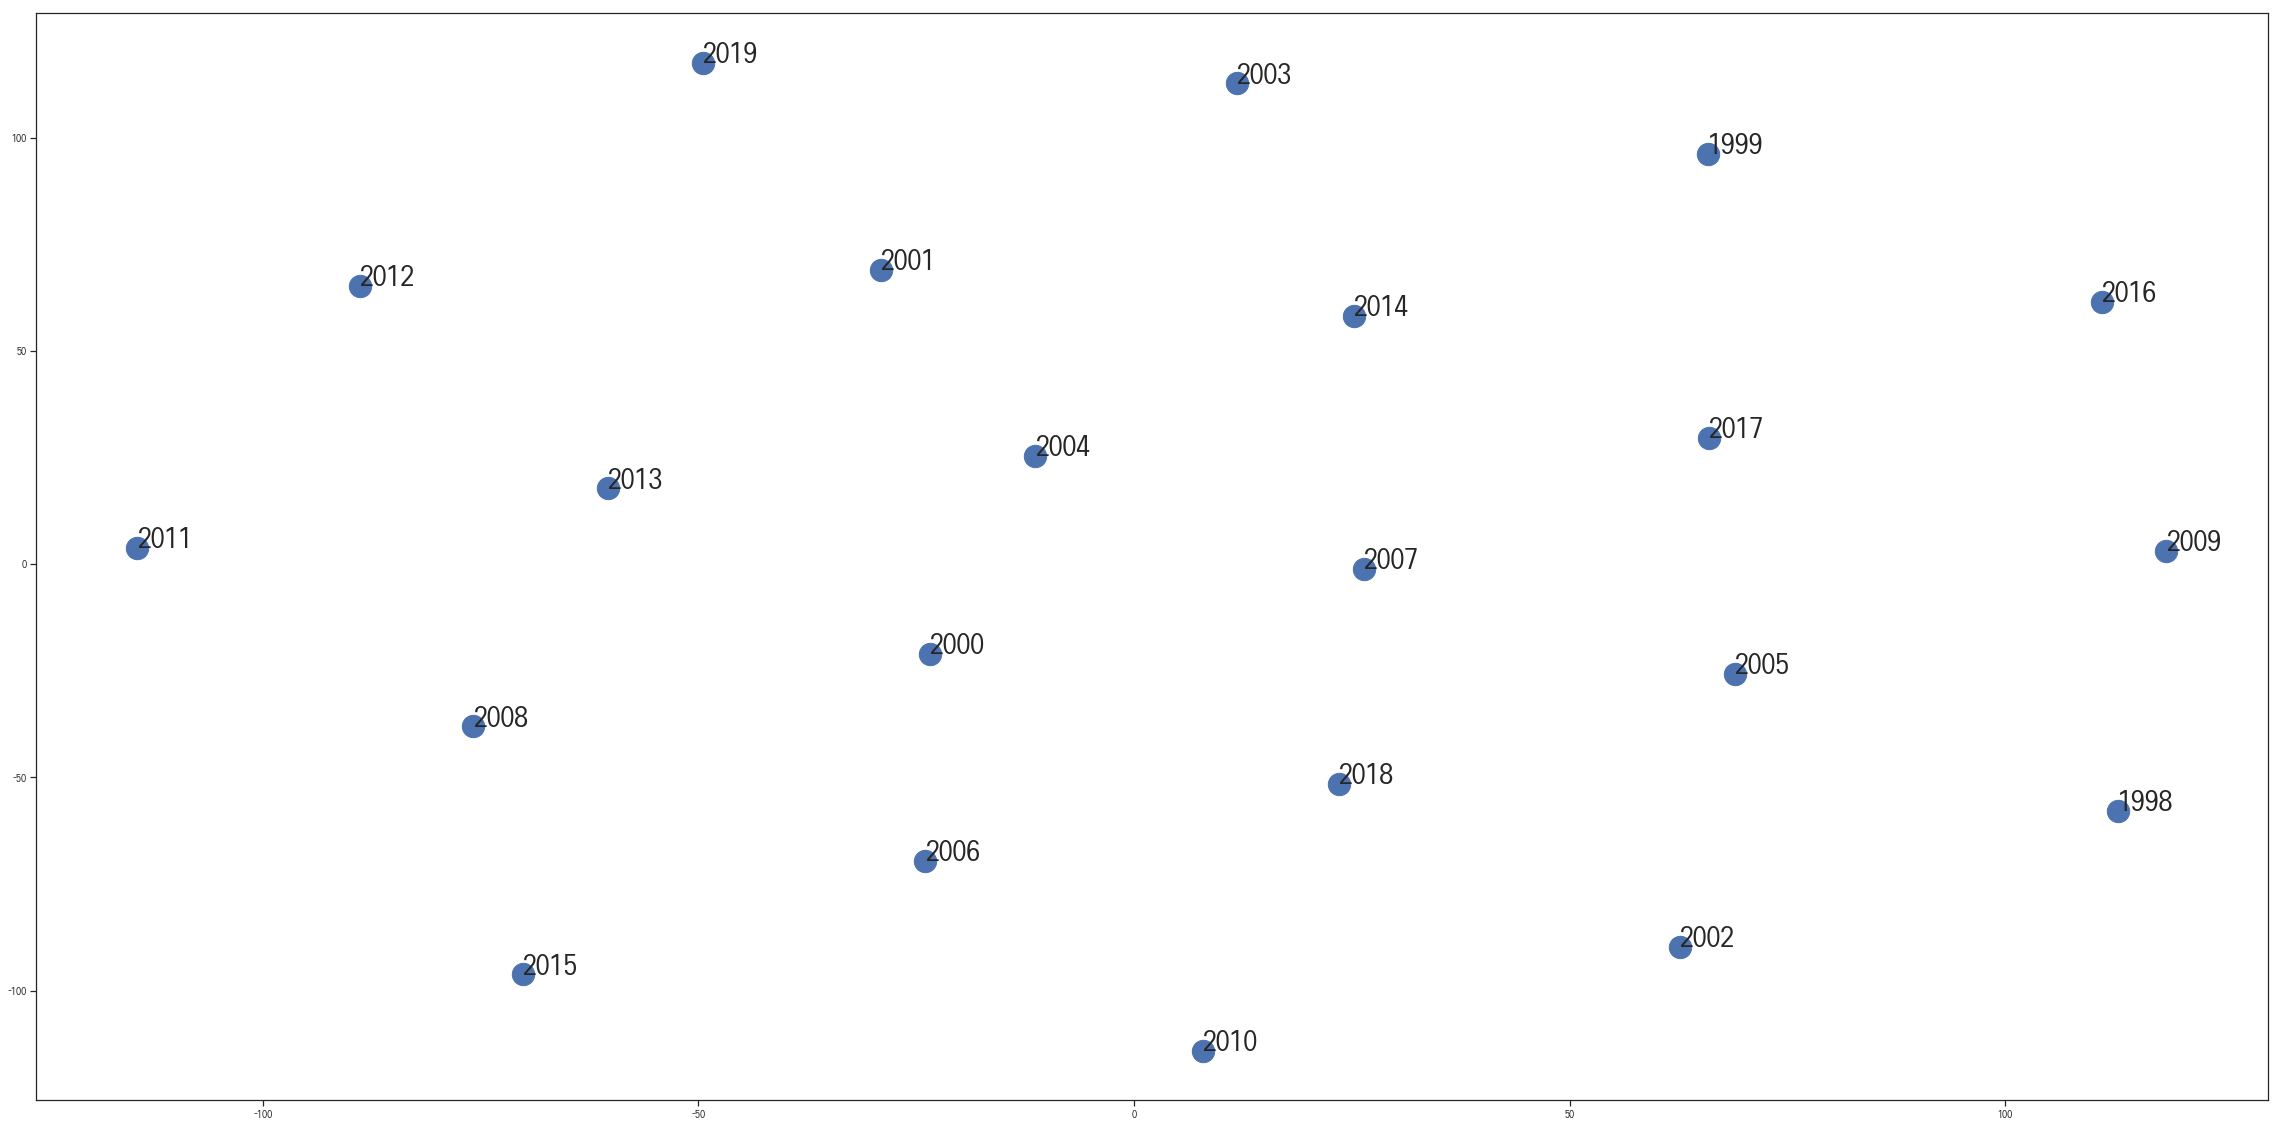

In [185]:
#1000차원

year_index = [x for x in range(1998, 2020)]

model_1000 = doc2vec_model_1000

document = [model_1000.docvecs[i] for i in range(0, len(model_1000.docvecs))]


tsne = TSNE(n_components=2)

X_tsne = tsne.fit_transform(document)

df = pd.DataFrame(X_tsne, index=year_index, columns=['x', 'y'])


fig = plt.figure()
fig.set_size_inches(40, 20)
ax = fig.add_subplot(1, 1, 1)

ax.scatter(df['x'], df['y'], s=500)

for word, pos in df.iterrows():
    ax.annotate(word, pos, fontsize=30)
    
plt.savefig('document_tsne_1000', dpi=300)

1. 워드 pca ok
2. 다큐먼트 tsne ok
3. 워드 pca -> tsne ok
4. 다큐먼트 pca -> tsne ok
5. 다큐먼트 차이 : pca ok
6. 다큐먼트 차이: pca -> tsne ok